Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#title connect google drive with google colab
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_wine_data='/content/drive/MyDrive/Wine Dataset.csv'

In [ ]:
df = pd.read_csv(path_wine_data)

In [ ]:
df.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [ ]:
df.shape

(1599, 12)

In [ ]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#remove duplicates

In [ ]:
df.duplicated().sum()

240

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(1359, 12)

#Check null values

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#set style

In [ ]:
sns.set_style("whitegrid")

In [ ]:
#define colors

In [ ]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78']

In [ ]:
#create a figure and define its size

In [ ]:
plt.figure(figsize=(20, 30))


<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

In [ ]:
#Plot 1: Distribution plot for fixed acidity

Text(0, 0.5, 'Density')

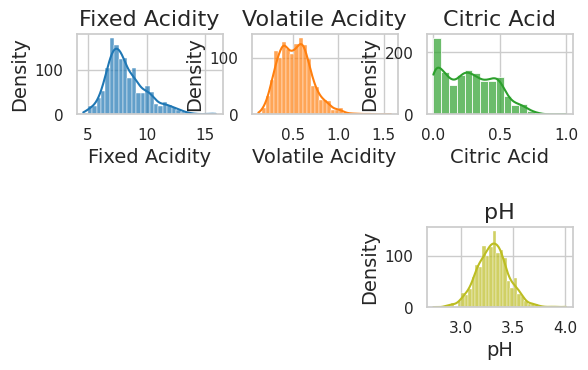

In [ ]:
plt.subplot(4, 3, 1)
sns.histplot(df['fixed acidity'], kde=True, color=colors[0], alpha=0.7)
plt.title('Fixed Acidity', fontsize=16)
plt.xlabel('Fixed Acidity', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.subplot(4, 3, 2)
sns.histplot(df['volatile acidity'], kde=True, color=colors[1], alpha=0.7)
plt.title('Volatile Acidity', fontsize=16)
plt.xlabel('Volatile Acidity', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.subplot(4, 3, 3)
sns.histplot(df['citric acid'], kde=True, color=colors[2], alpha=0.7)
plt.title('Citric Acid', fontsize=16)
plt.xlabel('Citric Acid', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.subplot(4, 3, 9)
sns.histplot(df['pH'], kde=True, color=colors[8], alpha=0.7)
plt.title('pH', fontsize=16)
plt.xlabel('pH', fontsize=14)
plt.ylabel('Density', fontsize=14)





# Adjust layout



In [ ]:
plt.tight_layout()



<Figure size 640x480 with 0 Axes>

In [ ]:
plt.show()

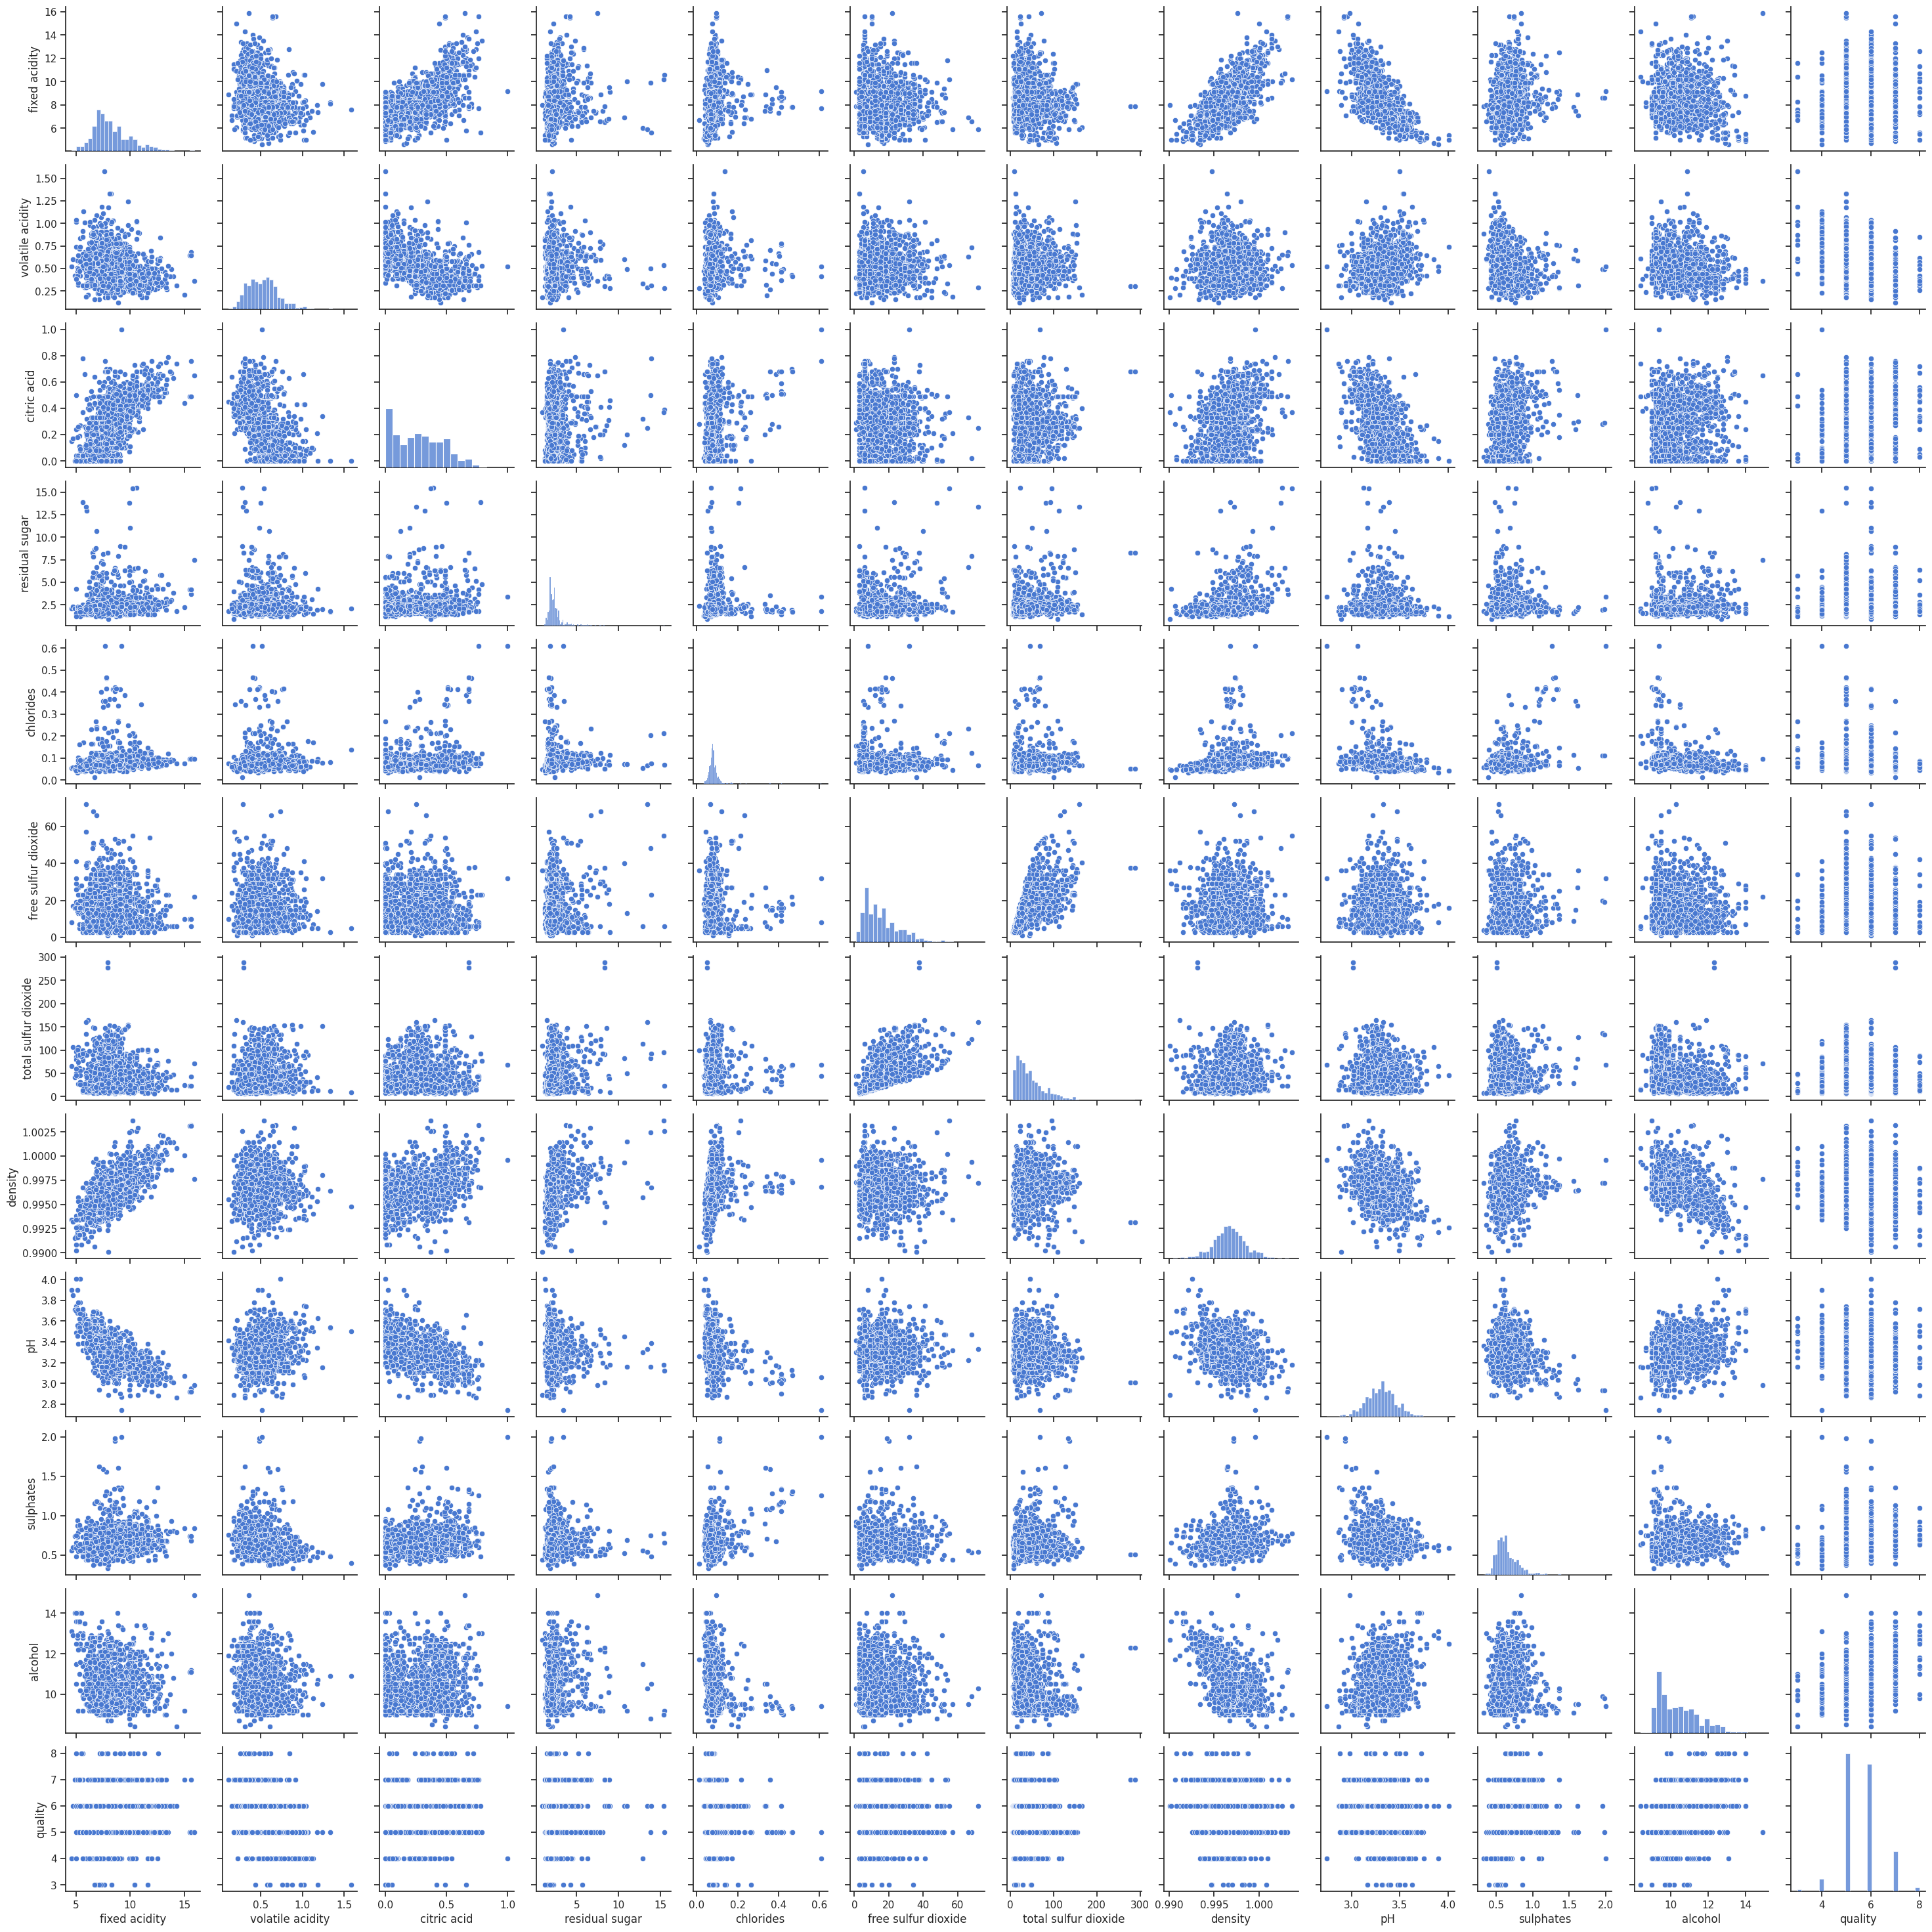

In [ ]:
sns.set(style="ticks", palette="muted")
sns.pairplot(df)

Data Visualisation

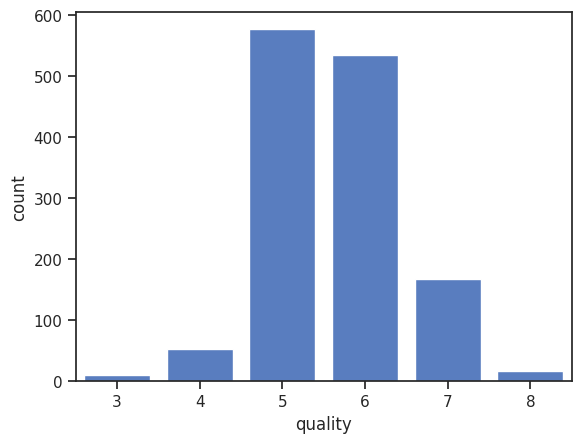

In [ ]:
sns.countplot(x='quality', data=df)
plt.show()

In [ ]:
#corelation of matrix

In [ ]:
correlation_matrix = df.corr()


In [ ]:
# Set up the matplotlib figure


In [ ]:
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Axes: >

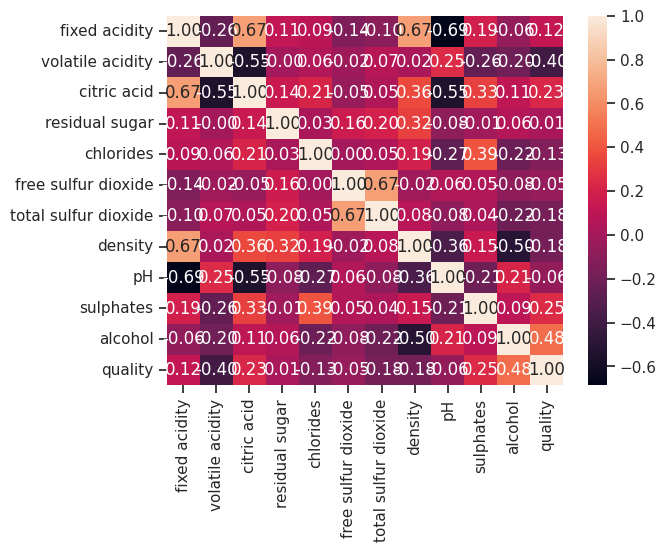

In [ ]:
#heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")

In [ ]:
# Adjust layout
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.05, right=0.95, hspace=0.2, wspace=0.2)




<Figure size 640x480 with 0 Axes>

In [ ]:
# Show plot
plt.show()

#Detect and remove outliers

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<Axes: xlabel='fixed acidity'>

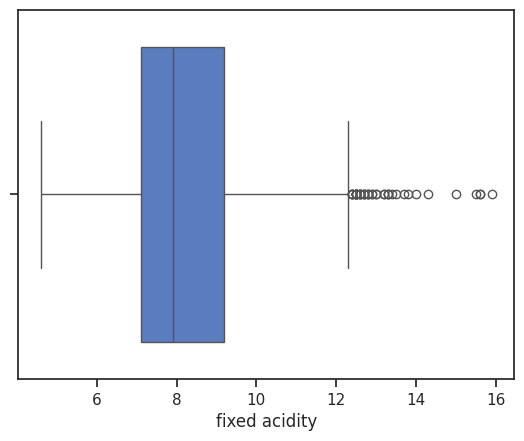

In [ ]:
sns.boxplot(data=df, x='fixed acidity')

In [ ]:
df['fixed acidity'].describe()

count    1359.000000
mean        8.310596
std         1.736990
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

In [ ]:
def find_outliers_using_three_sigma_rule(df, feature):
	max_boundary = df[feature].mean() + (3 * df[feature].std())
	min_boundary = df[feature].mean() - (3 * df[feature].std())
	# print(f'Highest Value: {max_boundary} \n Lowest Value: {min_boundary}')
	return df[(df[feature] > max_boundary) | (df[feature] < min_boundary)].shape

In [ ]:
def remove_outliers_using_three_sigma_rule(df, feature):
	max_boundary = df[feature].mean() + (3 * df[feature].std())
	min_boundary = df[feature].mean() - (3 * df[feature].std())
	new_df = df[(df[feature] < max_boundary) & (df[feature] > min_boundary)]
	return new_df


In [ ]:
find_outliers_using_three_sigma_rule(df, 'fixed acidity')

(9, 12)

In [ ]:
new_df = remove_outliers_using_three_sigma_rule(df, 'fixed acidity')

In [ ]:
new_df.sample(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
985            7.4             0.580         0.00             2.0      0.064   
974            8.8             0.330         0.41             5.9      0.073   
214            7.8             0.735         0.08             2.4      0.092   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
985                  7.0                  11.0  0.99562  3.45       0.58   
974                  7.0                  13.0  0.99658  3.30       0.62   
214                 10.0                  41.0  0.99740  3.24       0.71   

     alcohol  quality  
985     11.3        6  
974     12.1        7  
214      9.8        6

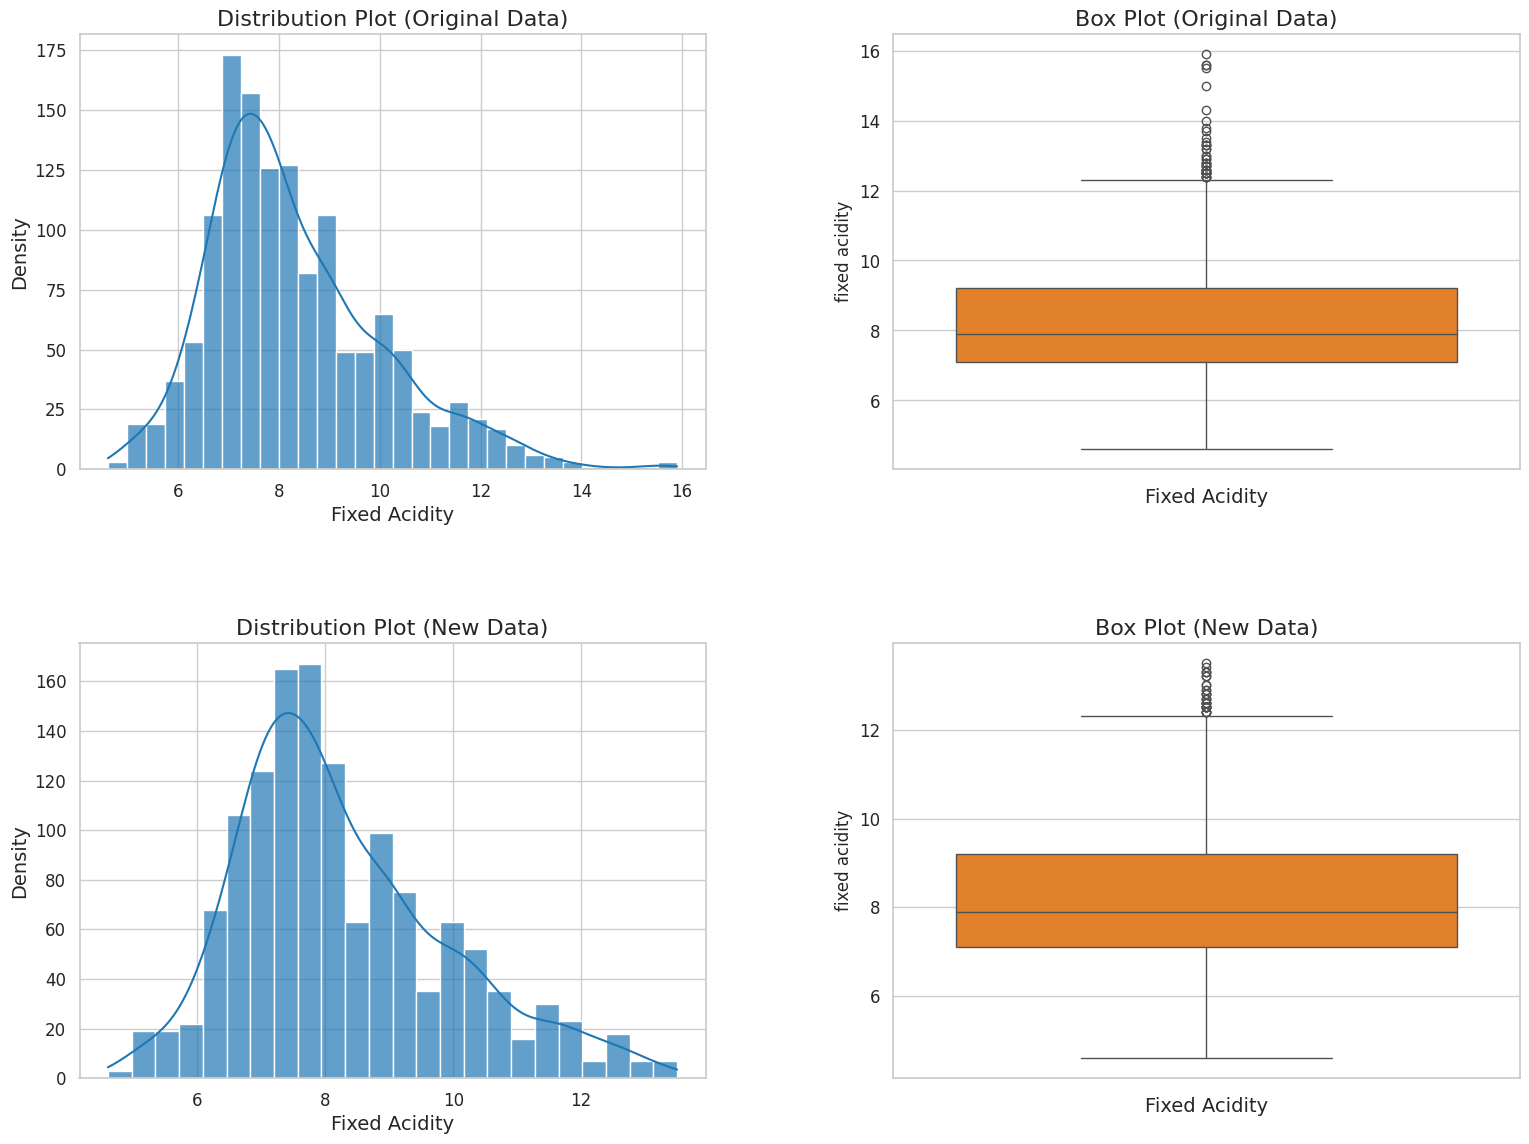

In [ ]:
# Set style
sns.set_style("whitegrid")

# Define colors
colors = ['#1f77b4', '#ff7f0e']

# Create a figure and define its size
plt.figure(figsize=(16, 12))

# Plot 1: Distribution plot for original data
plt.subplot(2, 2, 1)
sns.histplot(df['fixed acidity'], kde=True, color=colors[0], alpha=0.7)
plt.title('Distribution Plot (Original Data)', fontsize=16)
plt.xlabel('Fixed Acidity', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Plot 2: Box plot for original data
plt.subplot(2, 2, 2)
sns.boxplot(df['fixed acidity'], color=colors[1])
plt.title('Box Plot (Original Data)', fontsize=16)
plt.xlabel('Fixed Acidity', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.subplot(2, 2, 3)
sns.histplot(new_df['fixed acidity'], kde=True, color=colors[0], alpha=0.7)
plt.title('Distribution Plot (New Data)', fontsize=16)
plt.xlabel('Fixed Acidity', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.subplot(2, 2, 4)
sns.boxplot(new_df['fixed acidity'], color=colors[1])
plt.title('Box Plot (New Data)', fontsize=16)
plt.xlabel('Fixed Acidity', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Manually adjust layout
plt.subplots_adjust(top=0.95, bottom=0.08, left=0.05, right=0.95, hspace=0.4, wspace=0.3)

# Show the plots
plt.show()


<Axes: xlabel='fixed acidity', ylabel='Density'>

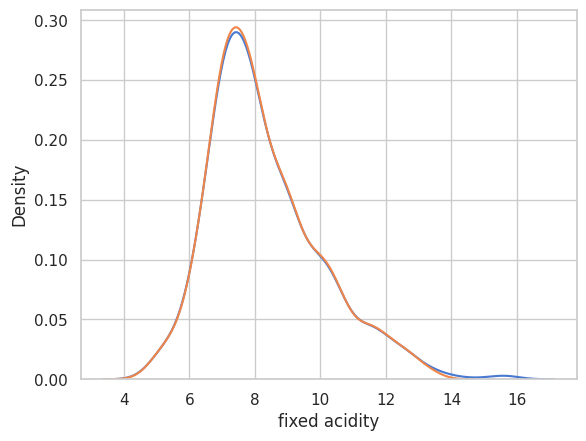

In [ ]:
sns.kdeplot(df['fixed acidity'], label='Original Data')
sns.kdeplot(new_df['fixed acidity'], label='New Data')

In [ ]:
df['fixed acidity'].describe(), new_df['fixed acidity'].describe()

(count    1359.000000
 mean        8.310596
 std         1.736990
 min         4.600000
 25%         7.100000
 50%         7.900000
 75%         9.200000
 max        15.900000
 Name: fixed acidity, dtype: float64,
 count    1350.000000
 mean        8.267185
 std         1.657697
 min         4.600000
 25%         7.100000
 50%         7.900000
 75%         9.200000
 max        13.500000
 Name: fixed acidity, dtype: float64)

In [ ]:
df = new_df

In [ ]:
df.shape

(1350, 12)

<Axes: xlabel='volatile acidity'>

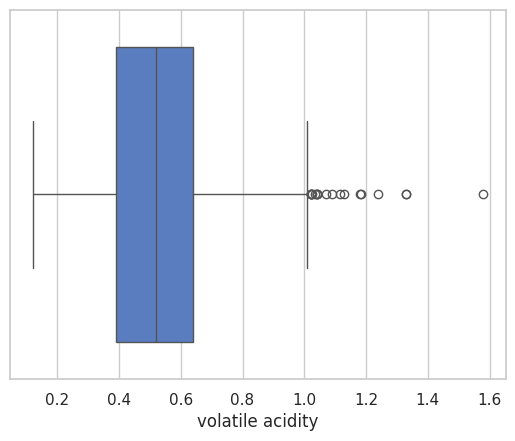

In [ ]:
sns.boxplot(data=df, x='volatile acidity')

In [ ]:
def find_outliers_using_interquartile_range(df, feature):
	percentile_25 = df[feature].quantile(0.25)
	percentile_75 = df[feature].quantile(0.75)
	# print(percentile_25, percentile_75)
	iqr = percentile_75 - percentile_25
	# print(iqr)
	lower_limit = percentile_25 - 1.5 * iqr
	upper_limit = percentile_75 + 1.5 * iqr
	# print(lower_limit, upper_limit)
	return df[(df[feature] > upper_limit) | (df[feature] < lower_limit)].shape

In [ ]:
def remove_outliers_using_interquartile_range(df, feature):
	percentile_25 = df[feature].quantile(0.25)
	percentile_75 = df[feature].quantile(0.75)
	iqr = percentile_75 - percentile_25
	lower_limit = percentile_25 - 1.5 * iqr
	upper_limit = percentile_75 + 1.5 * iqr
	return df[(df[feature] < upper_limit) & (df[feature] > lower_limit)]

In [ ]:
new_df_using_iqr = remove_outliers_using_interquartile_range(df, 'volatile acidity')

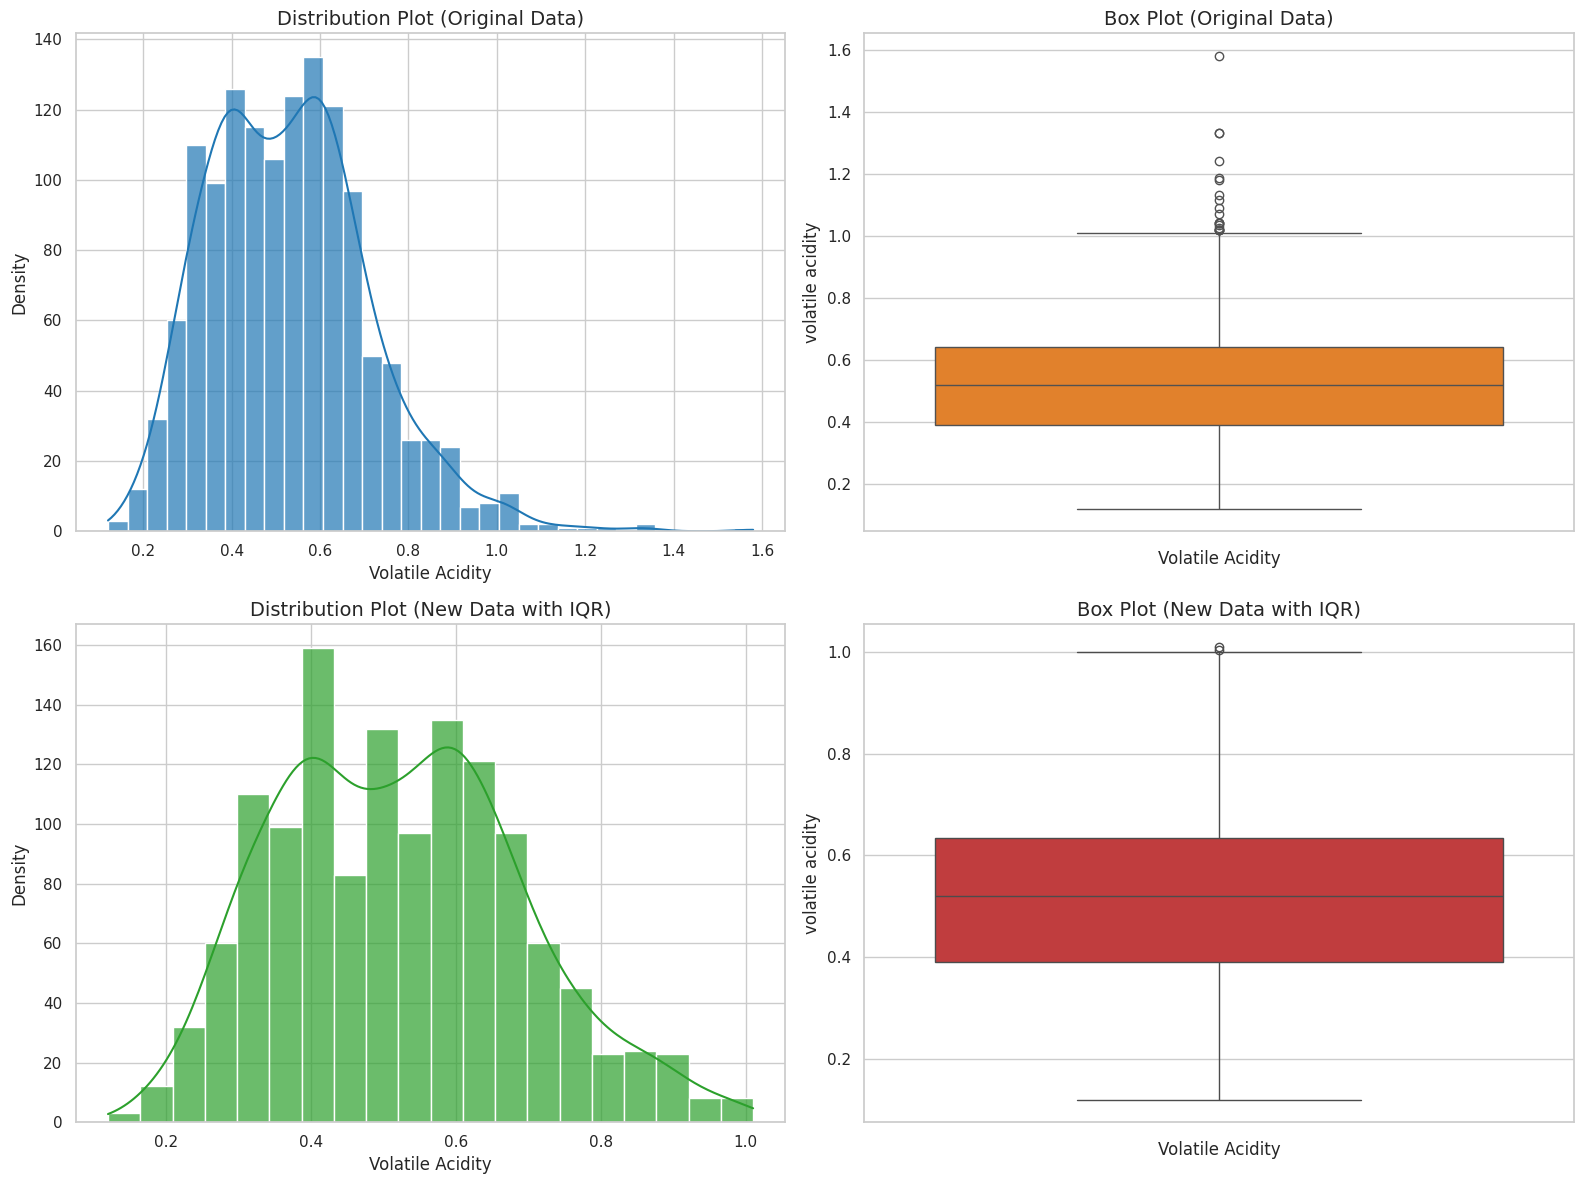

In [ ]:
# Define colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Create a figure and define its size
plt.figure(figsize=(16, 12))

# Plot 1: Distribution plot for original data
plt.subplot(2, 2, 1)
sns.histplot(df['volatile acidity'], kde=True, color=colors[0], alpha=0.7)
plt.title('Distribution Plot (Original Data)', fontsize=14)
plt.xlabel('Volatile Acidity', fontsize=12)
plt.ylabel('Density', fontsize=12)
# Plot 2: Box plot for original data
plt.subplot(2, 2, 2)
sns.boxplot(df['volatile acidity'], color=colors[1])
plt.title('Box Plot (Original Data)', fontsize=14)
plt.xlabel('Volatile Acidity', fontsize=12)

# Plot 3: Distribution plot for new data with IQR
plt.subplot(2, 2, 3)
sns.histplot(new_df_using_iqr['volatile acidity'], kde=True, color=colors[2], alpha=0.7)
plt.title('Distribution Plot (New Data with IQR)', fontsize=14)
plt.xlabel('Volatile Acidity', fontsize=12)
plt.ylabel('Density', fontsize=12)
# Plot 4: Box plot for new data with IQR
plt.subplot(2, 2, 4)
sns.boxplot(new_df_using_iqr['volatile acidity'], color=colors[3])
plt.title('Box Plot (New Data with IQR)', fontsize=14)
plt.xlabel('Volatile Acidity', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

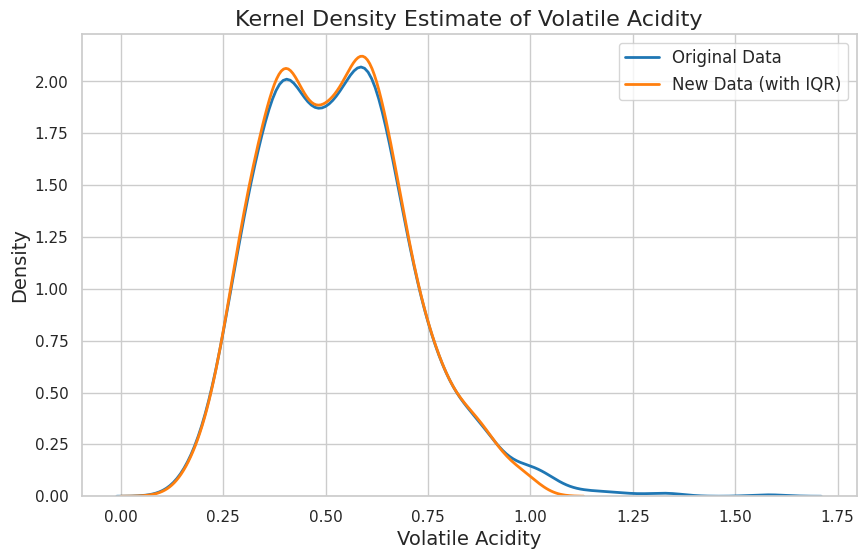

In [ ]:
# Set style
sns.set_style("whitegrid")

# Define colors
colors = ['#1f77b4', '#ff7f0e']

# Create a figure and define its size
plt.figure(figsize=(10, 6))

# Plot KDE for original data
sns.kdeplot(df['volatile acidity'], color=colors[0], label='Original Data', linewidth=2)

# Plot KDE for new data with IQR
sns.kdeplot(new_df_using_iqr['volatile acidity'], color=colors[1], label='New Data (with IQR)', linewidth=2)
# Add titles and labels
plt.title('Kernel Density Estimate of Volatile Acidity', fontsize=16)
plt.xlabel('Volatile Acidity', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add legend
plt.legend(fontsize=12)

# Show plot
plt.show()

In [ ]:
df = new_df_using_iqr

In [ ]:
df.shape

(1330, 13)

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

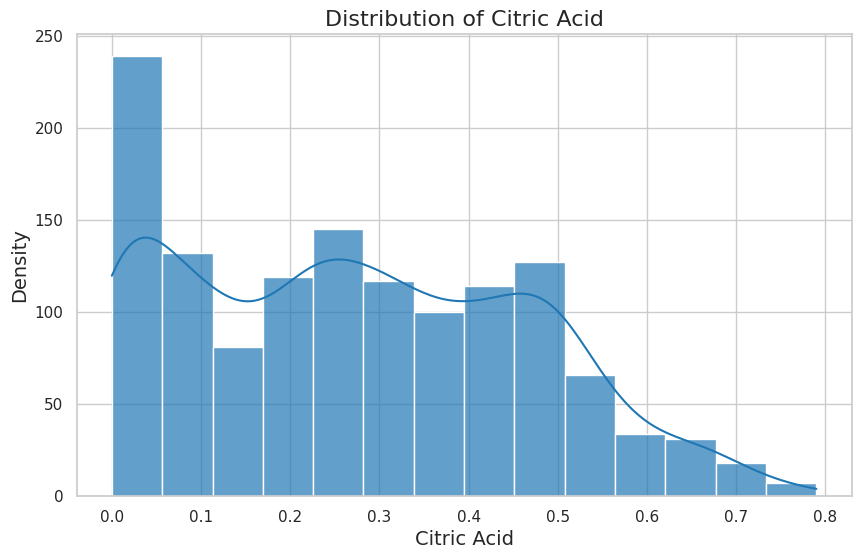

In [ ]:
# Set style
sns.set_style("whitegrid")

# Define colors
color = '#1f77b4'

# Create a figure and define its size
plt.figure(figsize=(10, 6))

# Plot histogram with KDE for citric acid
sns.histplot(df['citric acid'], kde=True, color=color, alpha=0.7)
# Add title and labels
plt.title('Distribution of Citric Acid', fontsize=16)
plt.xlabel('Citric Acid', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show plot
plt.show()

<Axes: xlabel='citric acid'>

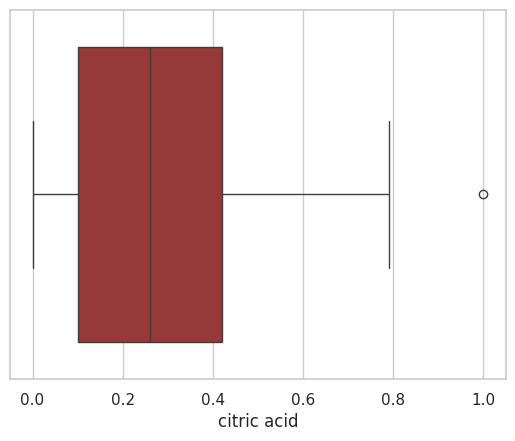

In [ ]:
sns.boxplot(data=df, x='citric acid', color='brown')

In [ ]:
df['citric acid'].describe()

count    1331.000000
mean        0.272141
std         0.193810
min         0.000000
25%         0.100000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64

In [ ]:
df['citric acid'].skew()

0.2720349732918465

In [ ]:
find_outliers_using_interquartile_range(df, 'citric acid')

(1, 12)

In [ ]:
new_df_using_iqr = remove_outliers_using_interquartile_range(df, 'citric acid')

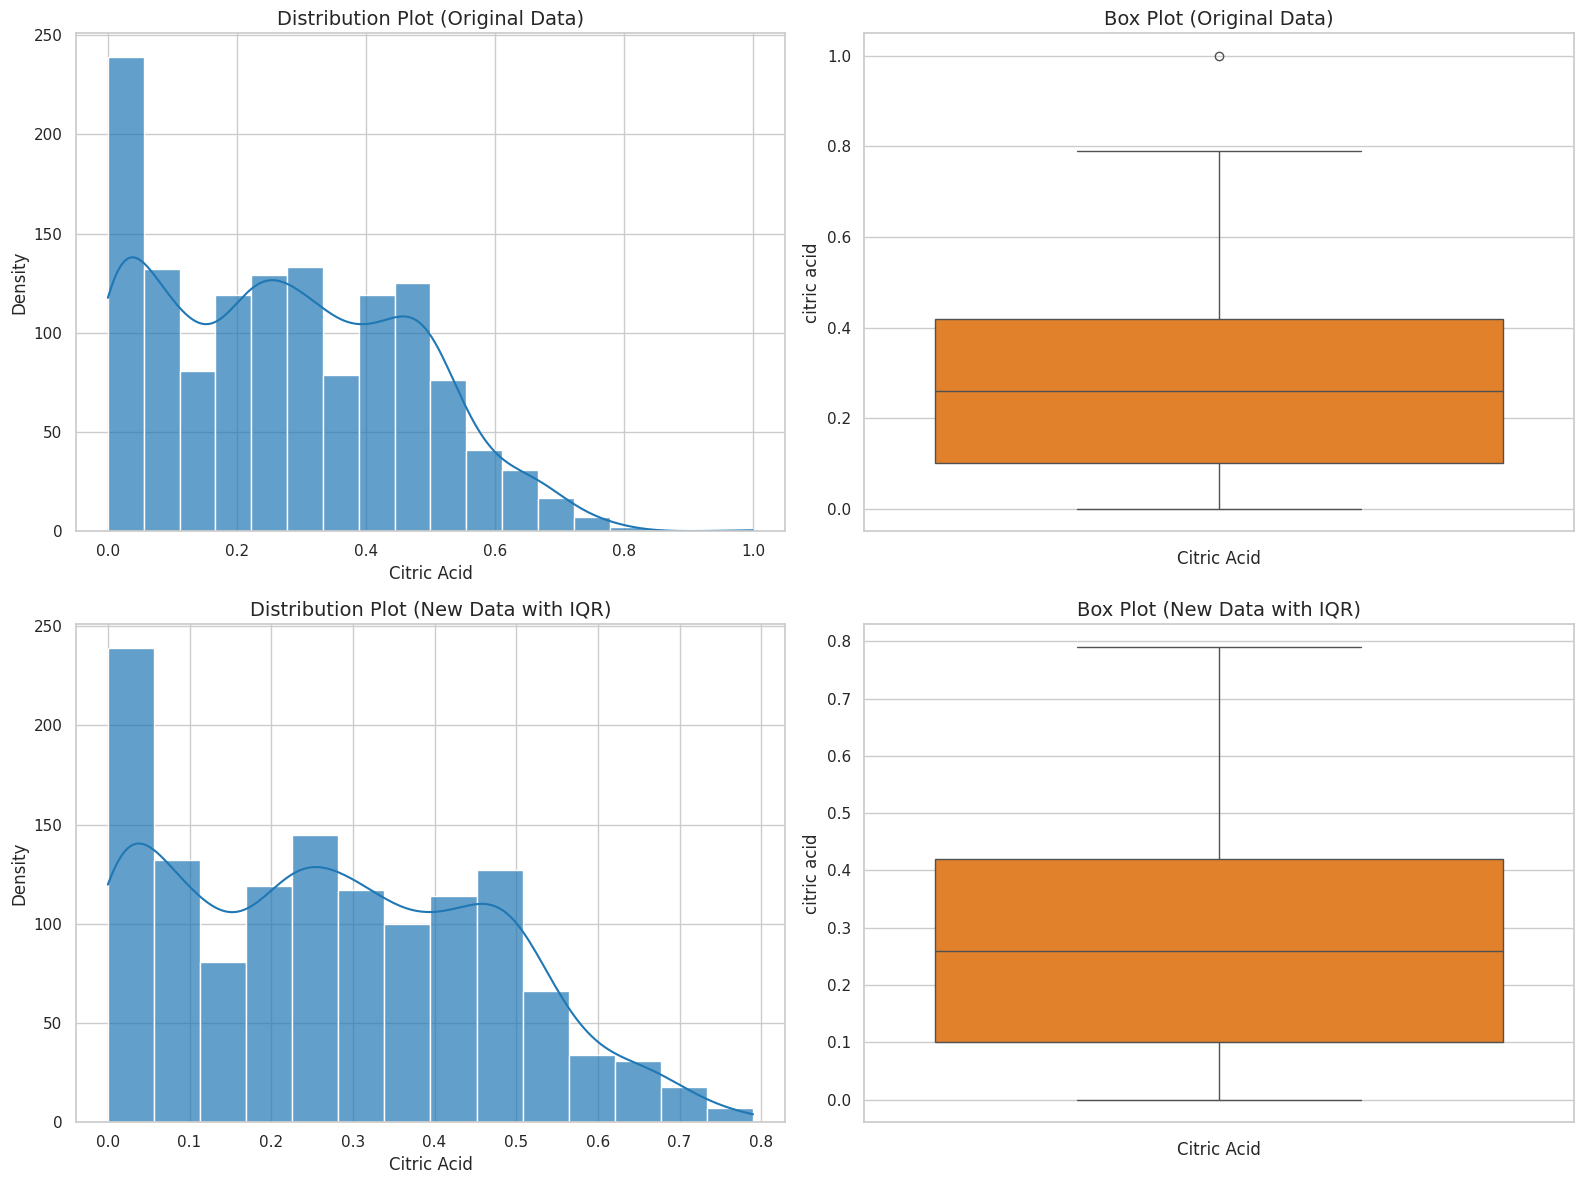

In [ ]:
# Set style
sns.set_style("whitegrid")

# Define colors
colors = ['#1f77b4', '#ff7f0e']

# Create a figure and define its size
plt.figure(figsize=(16, 12))

# Plot 1: Distribution plot for original data
plt.subplot(2, 2, 1)
sns.histplot(df['citric acid'], kde=True, color=colors[0], alpha=0.7)
plt.title('Distribution Plot (Original Data)', fontsize=14)
plt.xlabel('Citric Acid', fontsize=12)
plt.ylabel('Density', fontsize=12)
# Plot 2: Box plot for original data
plt.subplot(2, 2, 2)
sns.boxplot(df['citric acid'], color=colors[1])
plt.title('Box Plot (Original Data)', fontsize=14)
plt.xlabel('Citric Acid', fontsize=12)

# Plot 3: Distribution plot for new data with IQR
plt.subplot(2, 2, 3)
sns.histplot(new_df_using_iqr['citric acid'], kde=True, color=colors[0], alpha=0.7)
plt.title('Distribution Plot (New Data with IQR)', fontsize=14)
plt.xlabel('Citric Acid', fontsize=12)
plt.ylabel('Density', fontsize=12)
# Plot 4: Box plot for new data with IQR
plt.subplot(2, 2, 4)
sns.boxplot(new_df_using_iqr['citric acid'], color=colors[1])
plt.title('Box Plot (New Data with IQR)', fontsize=14)
plt.xlabel('Citric Acid', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
df = new_df_using_iqr

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

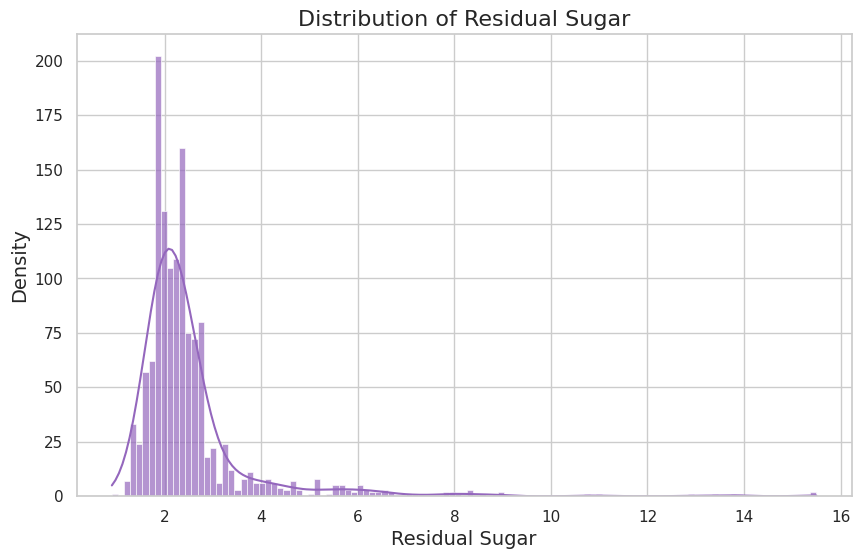

In [ ]:
# Set style
sns.set_style("whitegrid")

# Define color
color = '#9467bd'  # unique color

# Create a figure and define its size
plt.figure(figsize=(10, 6))

# Plot histogram with KDE for residual sugar
sns.histplot(df['residual sugar'], kde=True, color=color, alpha=0.7)
# Add title and labels
plt.title('Distribution of Residual Sugar', fontsize=16)
plt.xlabel('Residual Sugar', fontsize=14)
plt.ylabel('Density', fontsize=14)
#Show plot
plt.show()

<Axes: ylabel='residual sugar'>

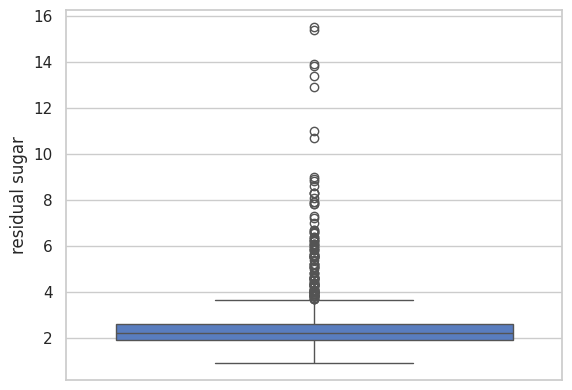

In [ ]:
sns.boxplot(df['residual sugar'])

In [ ]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
5      9.4        5

In [ ]:
def remove_outliers_using_imputation(df, feature):
	median_residual_sugar = df[feature].mean()
	Q1 = df[feature].quantile(0.25)
	Q3 = df[feature].quantile(0.75)
	# Calculate IQR
	IQR = Q3 - Q1
	df[feature+' new'] = np.where((df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR)),
                                median_residual_sugar, df[feature])
	return df

In [ ]:
df = remove_outliers_using_imputation(df, 'residual sugar')

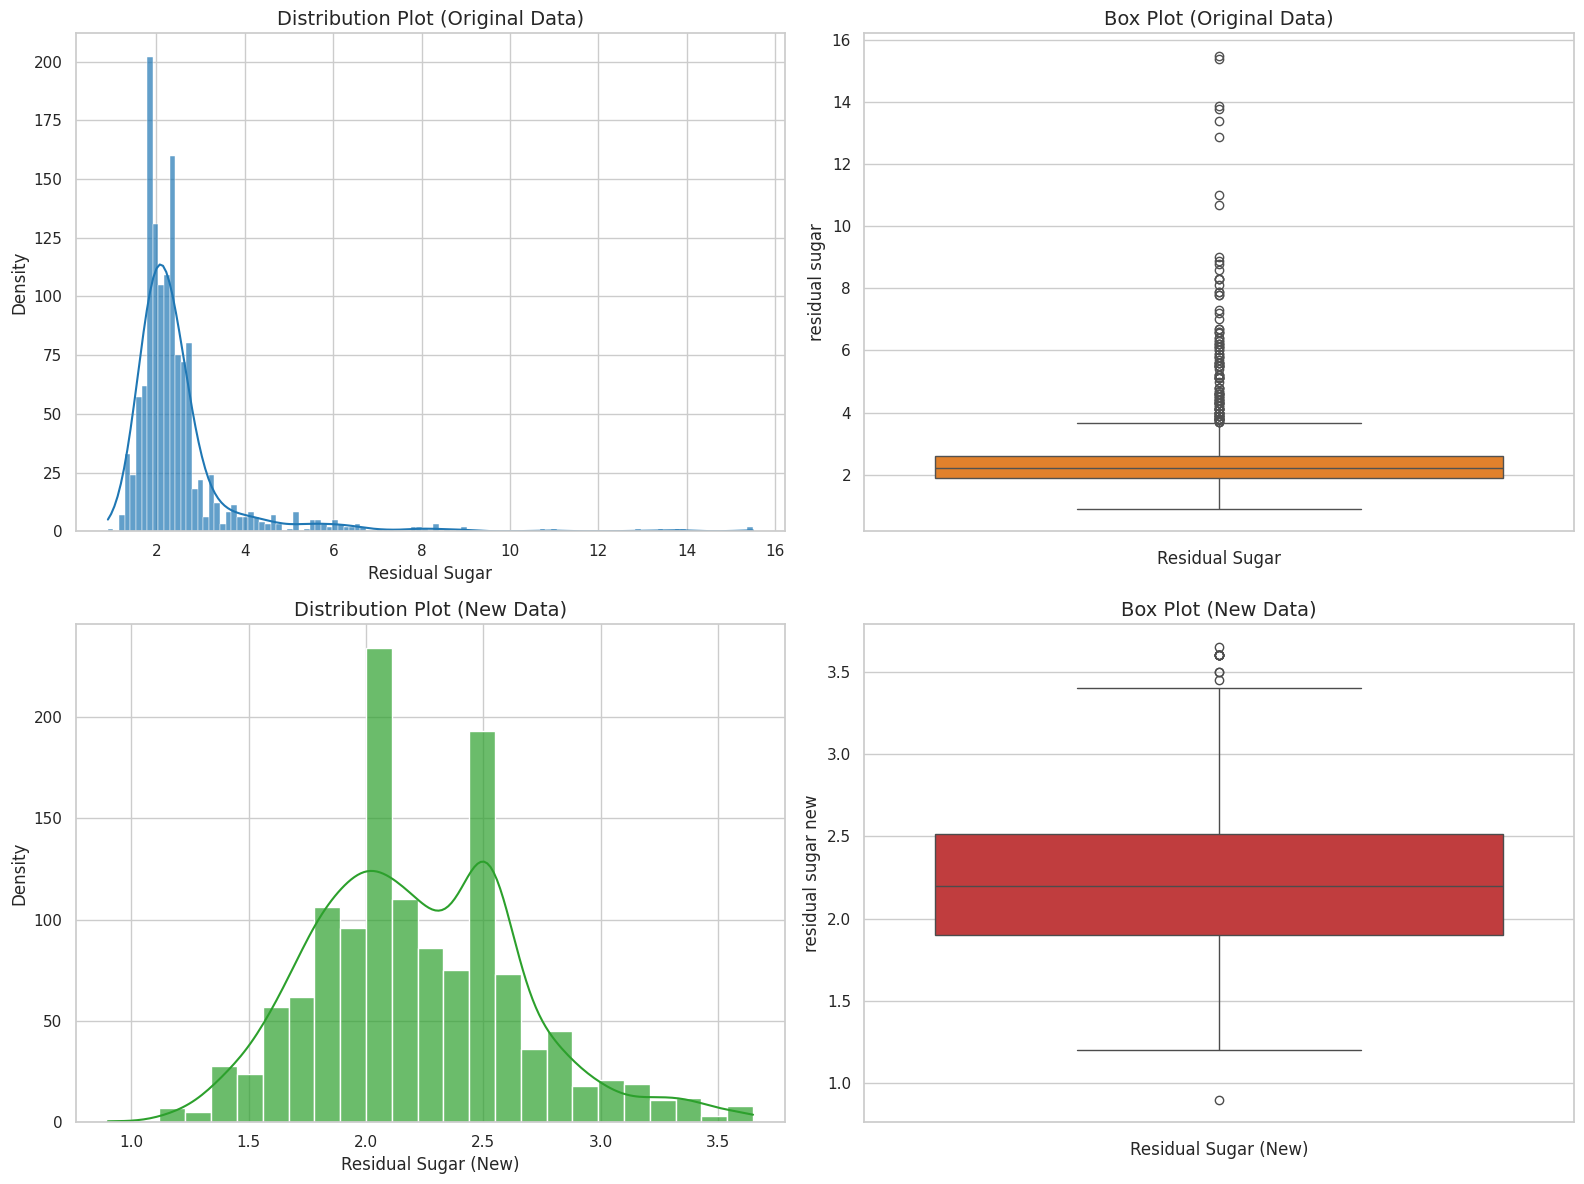

In [ ]:
# Set style
sns.set_style("whitegrid")

# Define colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Create a figure and define its size
plt.figure(figsize=(16, 12))

# Plot 1: Distribution plot for original data
plt.subplot(2, 2, 1)
sns.histplot(df['residual sugar'], kde=True, color=colors[0], alpha=0.7)
plt.title('Distribution Plot (Original Data)', fontsize=14)
plt.xlabel('Residual Sugar', fontsize=12)
plt.ylabel('Density', fontsize=12)
# Plot 2: Box plot for original data
plt.subplot(2, 2, 2)
sns.boxplot(df['residual sugar'], color=colors[1])
plt.title('Box Plot (Original Data)', fontsize=14)
plt.xlabel('Residual Sugar', fontsize=12)
# Plot 3: Distribution plot for new data
plt.subplot(2, 2, 3)
sns.histplot(df['residual sugar new'], kde=True, color=colors[2], alpha=0.7)
plt.title('Distribution Plot (New Data)', fontsize=14)
plt.xlabel('Residual Sugar (New)', fontsize=12)
plt.ylabel('Density', fontsize=12)
# Plot 4: Box plot for new data
plt.subplot(2, 2, 4)
sns.boxplot(df['residual sugar new'], color=colors[3])
plt.title('Box Plot (New Data)', fontsize=14)
plt.xlabel('Residual Sugar (New)', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
df['residual sugar'].describe(), df['residual sugar new'].describe()

(count    1330.000000
 mean        2.515677
 std         1.350897
 min         0.900000
 25%         1.900000
 50%         2.200000
 75%         2.600000
 max        15.500000
 Name: residual sugar, dtype: float64,
 count    1330.000000
 mean        2.216628
 std         0.442816
 min         0.900000
 25%         1.900000
 50%         2.200000
 75%         2.515677
 max         3.650000
 Name: residual sugar new, dtype: float64)

In [ ]:
df.sample(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
356            11.5              0.41         0.52             3.0      0.080   
185             8.9              0.31         0.57             2.0      0.111   
1540            6.2              0.52         0.08             4.4      0.071   
706             7.0              0.78         0.08             2.0      0.093   
263             7.9              0.37         0.23             1.8      0.077   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
356                  29.0                  55.0  1.00010  3.26       0.88   
185                  26.0                  85.0  0.99710  3.26       0.53   
1540                 11.0                  32.0  0.99646  3.56       0.63   
706                  10.0                  19.0  0.99560  3.40       0.47   
263                  23.0                  49.0  0.99630  3.28       0.67   

      alcohol  quality  residual sugar new  
356      11.0        5            3.000000  
185       9.7        5            2.000000  
1540     11.6        6            2.515677  
706      10.0        5            2.000000  
263       9.3        5            1.800000

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'residual sugar new'],
      dtype='object')

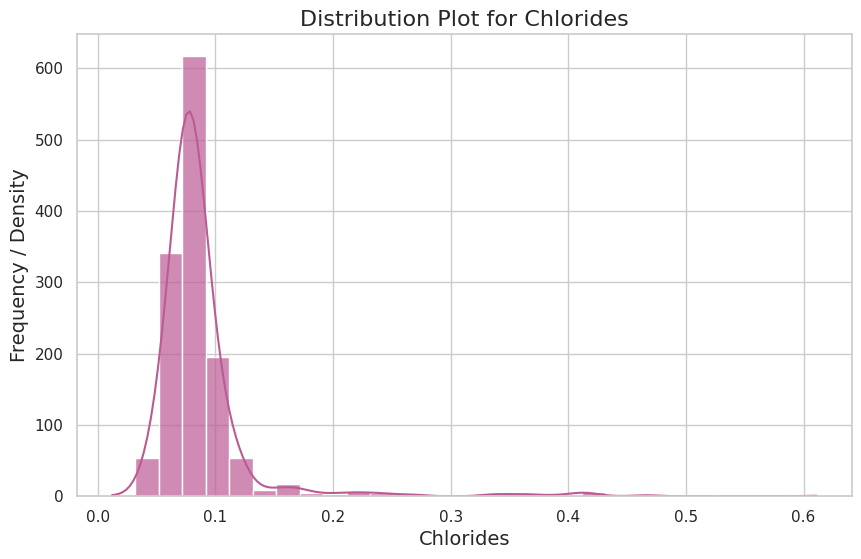

In [ ]:
# Define color
color = '#BC5A94'  # Unique color

# Create a figure and define its size
plt.figure(figsize=(10, 6))

# Plot histogram with KDE for chlorides
sns.histplot(df['chlorides'], kde=True, color=color, bins=30, alpha=0.7)

# Add title and labels
plt.title('Distribution Plot for Chlorides', fontsize=16)
plt.xlabel('Chlorides', fontsize=14)
plt.ylabel('Frequency / Density', fontsize=14)
plt.show()

<Axes: xlabel='chlorides'>

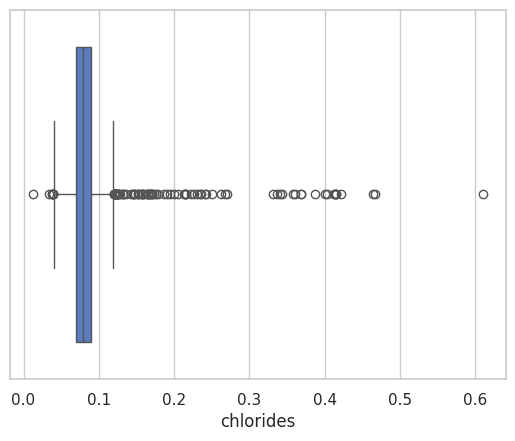

In [ ]:
sns.boxplot(data=df, x='chlorides')

In [ ]:
find_outliers_using_interquartile_range(df, 'chlorides')

(97, 13)

In [ ]:
df = remove_outliers_using_imputation(df, 'chlorides')

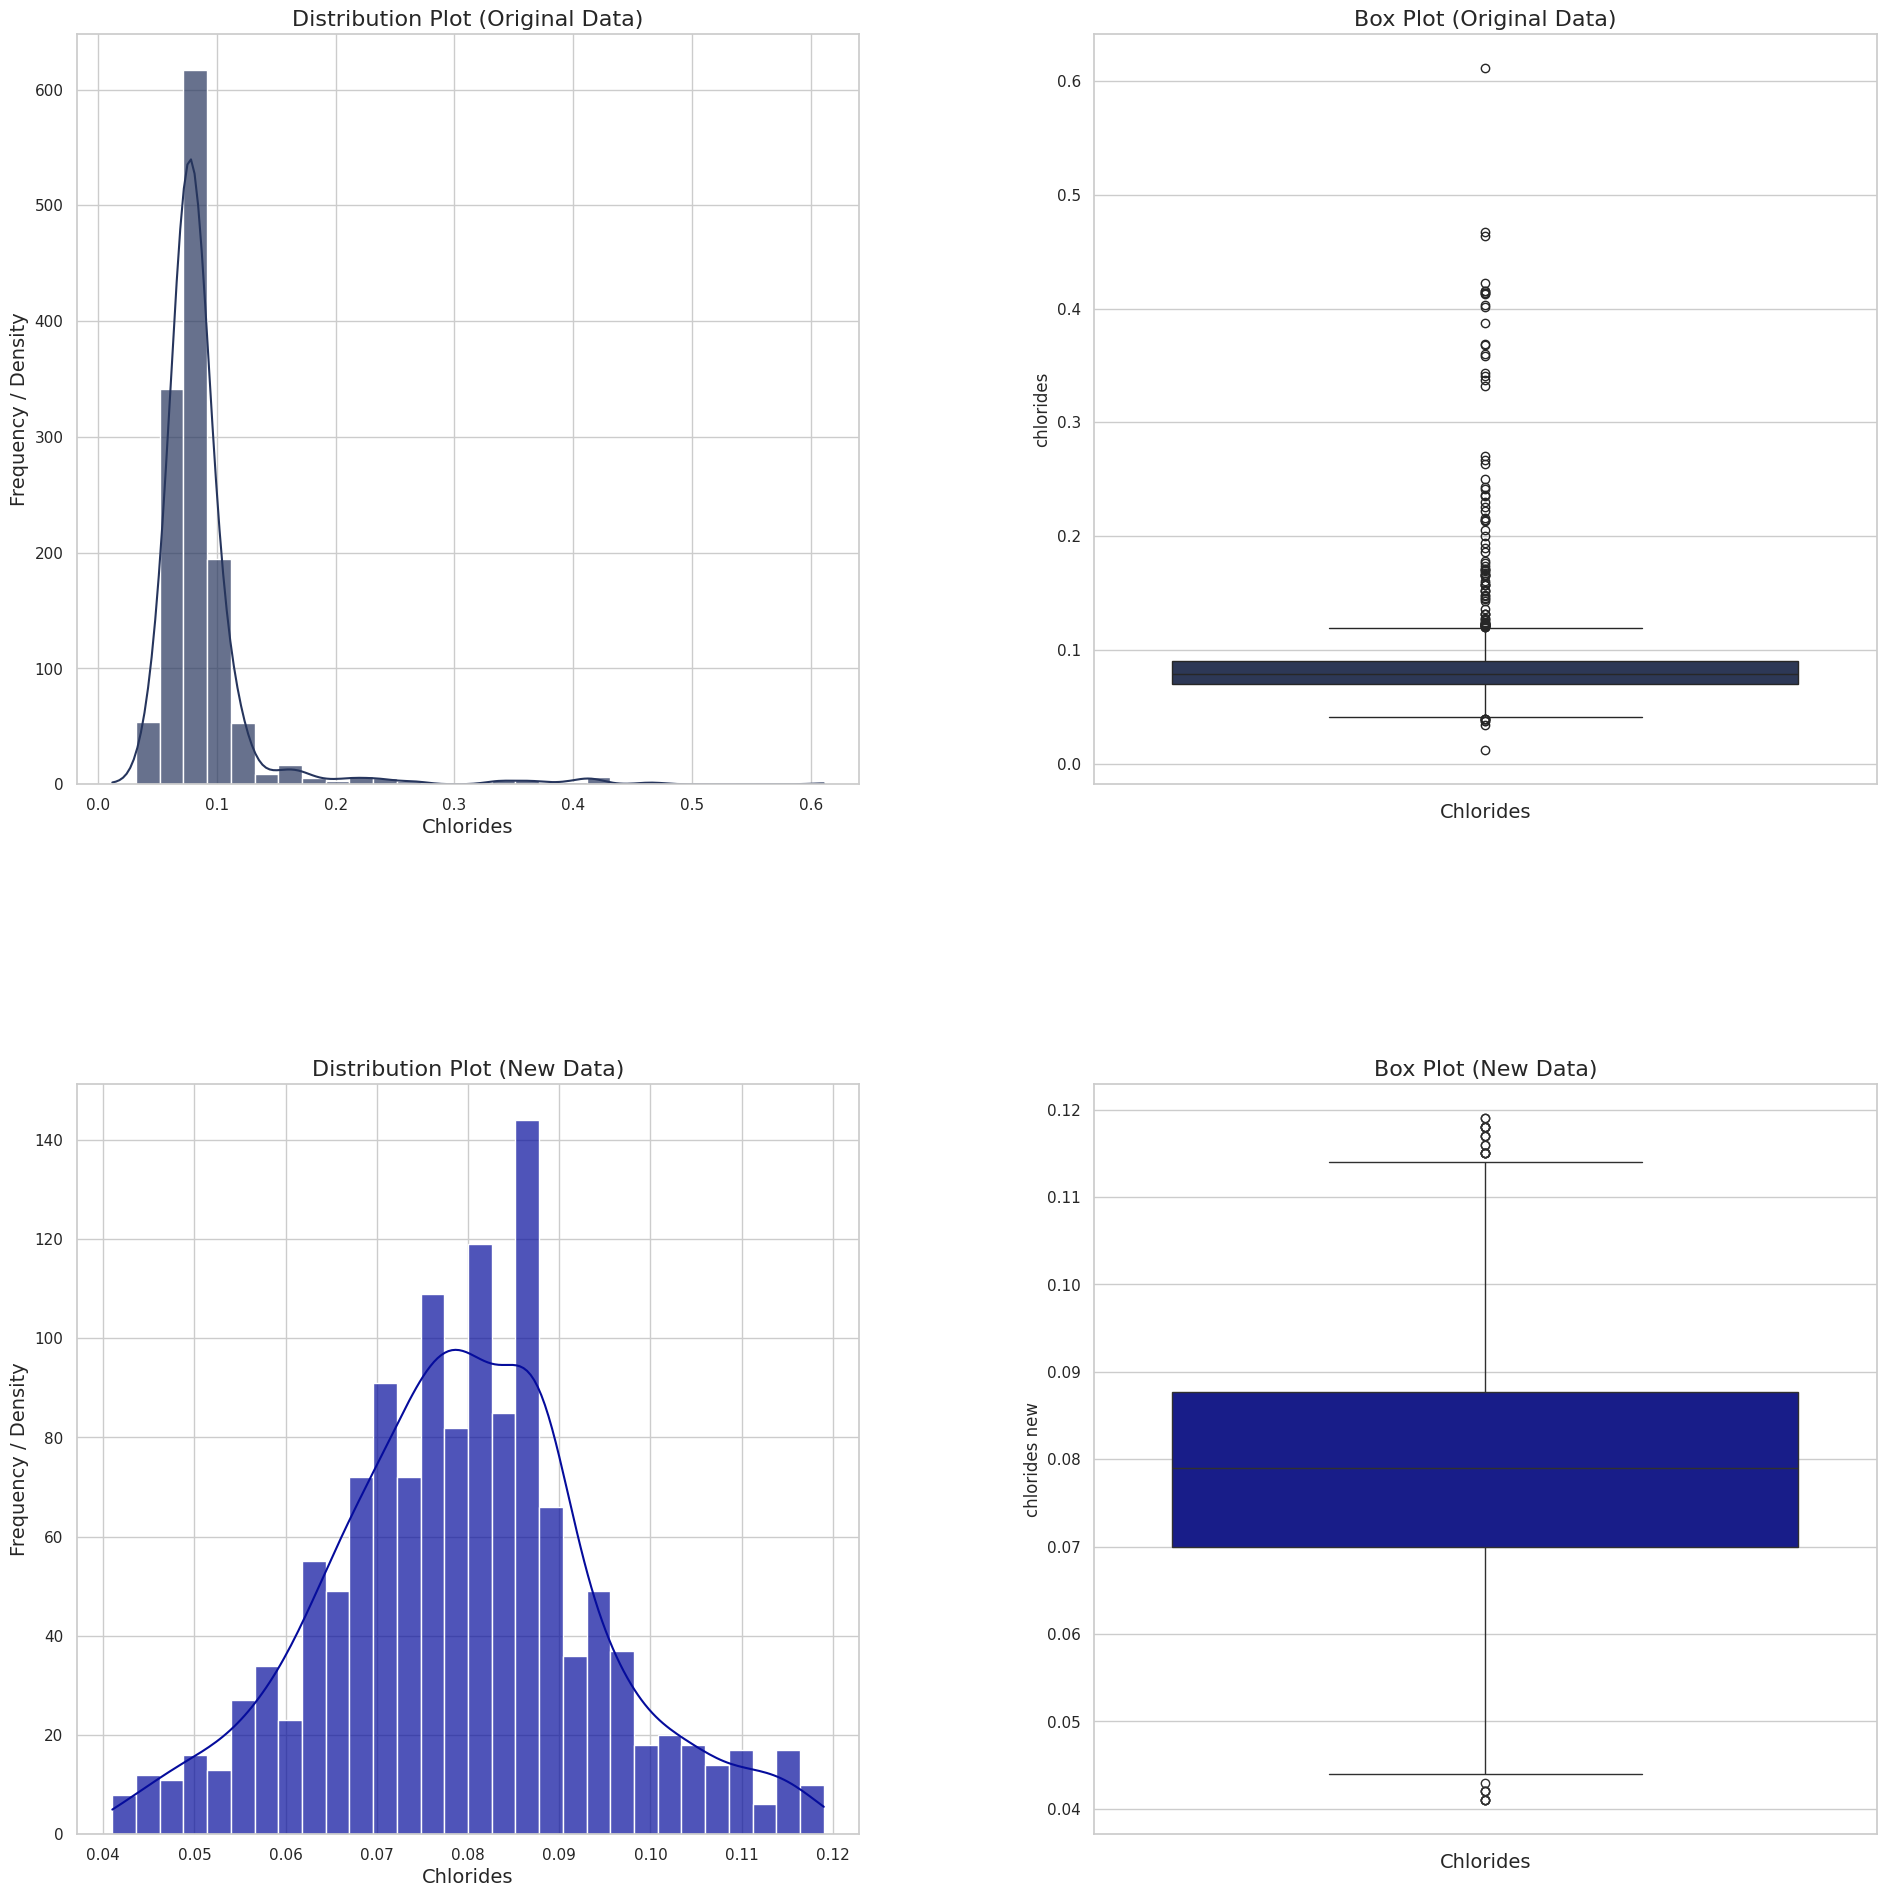

In [ ]:
# Define colors
color1 = '#26355D'  # Color for original data
color2 = '#050C9C'  # Color for new data

# Create a figure and define its size
plt.figure(figsize=(20, 20))

# Plot 1: Distribution plot for original data (chlorides)
plt.subplot(2, 2, 1)
sns.histplot(df['chlorides'], kde=True, color=color1, bins=30, alpha=0.7)
plt.title('Distribution Plot (Original Data)', fontsize=16)
plt.xlabel('Chlorides', fontsize=14)
plt.ylabel('Frequency / Density', fontsize=14)

# Plot 2: Box plot for original data (chlorides)
plt.subplot(2, 2, 2)
sns.boxplot(df['chlorides'], color=color1)
plt.title('Box Plot (Original Data)', fontsize=16)
plt.xlabel('Chlorides', fontsize=14)

# Plot 3: Distribution plot for new data (chlorides new)
plt.subplot(2, 2, 3)
sns.histplot(df['chlorides new'], kde=True, color=color2, bins=30, alpha=0.7)
plt.title('Distribution Plot (New Data)', fontsize=16)
plt.xlabel('Chlorides', fontsize=14)
plt.ylabel('Frequency / Density', fontsize=14)
# Plot 4: Box plot for new data (chlorides new)
plt.subplot(2, 2, 4)
sns.boxplot(df['chlorides new'], color=color2)
plt.title('Box Plot (New Data)', fontsize=16)
plt.xlabel('Chlorides', fontsize=14)

# Manually adjust layout
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.05, right=0.95, hspace=0.4, wspace=0.3)

# Show the plots
plt.show()

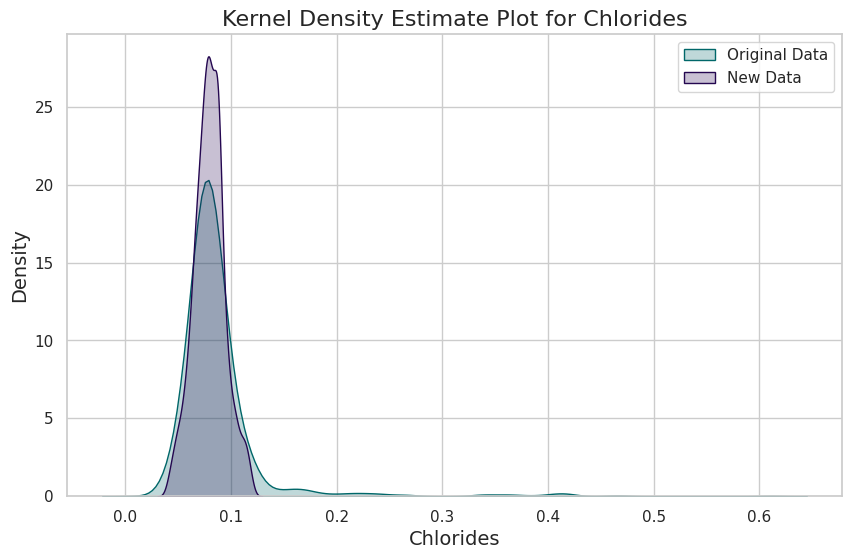

In [ ]:
# Define colors
color1 = '#006769'  # Color for original data
color2 = '#240750'  # Color for new data

# Create a figure and define its size
plt.figure(figsize=(10, 6))

# Plot KDE plots for both original and new data
sns.kdeplot(df['chlorides'], color=color1, fill=True, label='Original Data')
sns.kdeplot(df['chlorides new'], color=color2, fill=True, label='New Data')

# Add title and labels
plt.title('Kernel Density Estimate Plot for Chlorides', fontsize=16)
plt.xlabel('Chlorides', fontsize=14)
plt.ylabel('Density', fontsize=14)
# Add legend
plt.legend()

# Show plot
plt.show()

<ipython-input-99-8a0d303d3510>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['chlorides'])
<ipython-input-99-8a0d303d3510>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['chlorides new'])


<Axes: ylabel='chlorides new'>

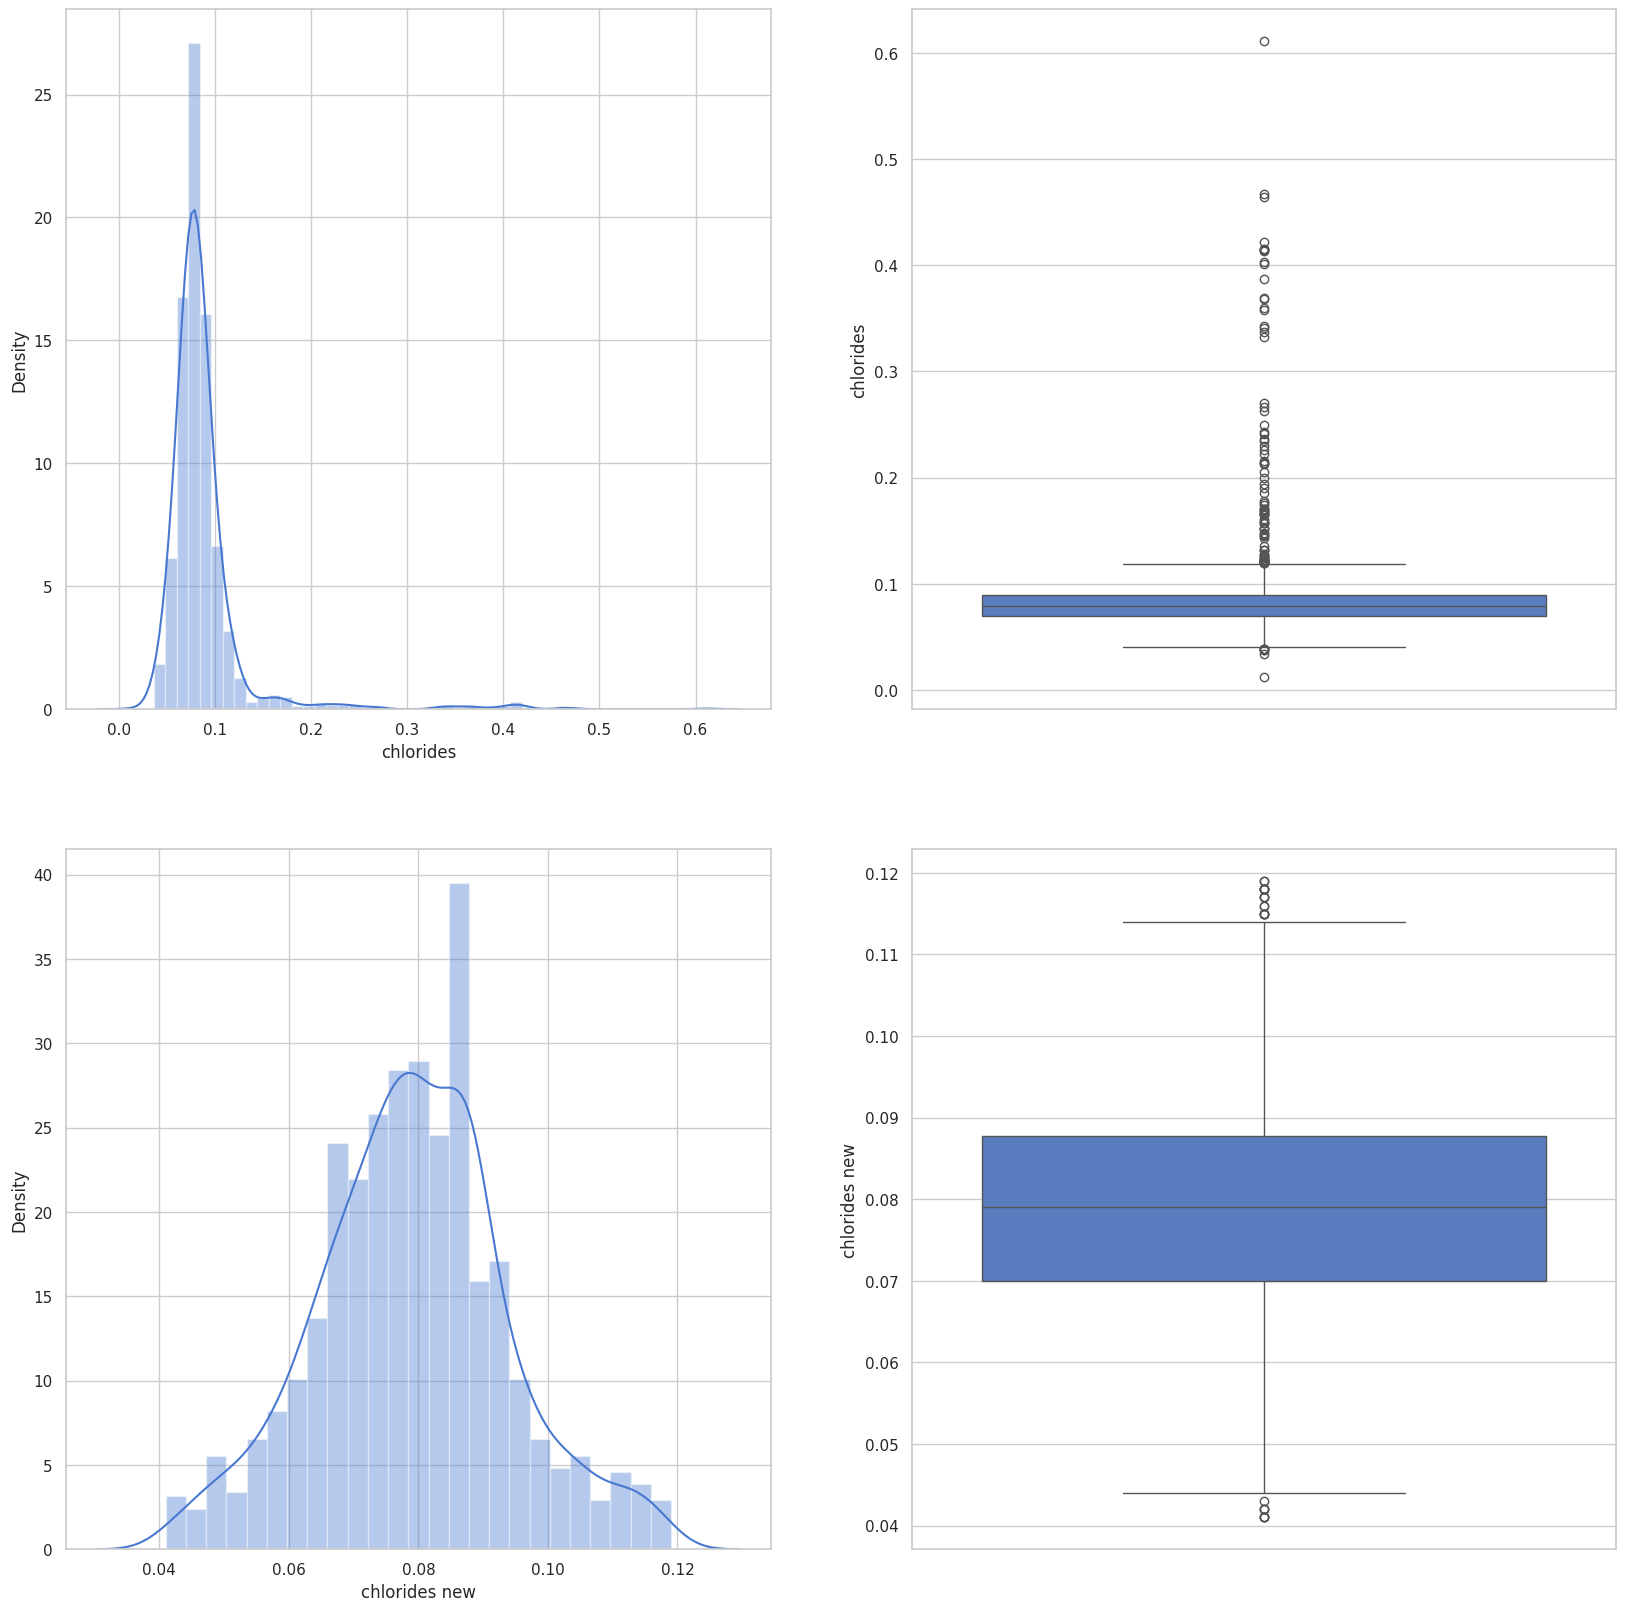

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(2, 2, 1)
sns.distplot(df['chlorides'])

plt.subplot(2, 2, 2)
sns.boxplot(df['chlorides'])

plt.subplot(2, 2, 3)
sns.distplot(df['chlorides new'])

plt.subplot(2, 2, 4)
sns.boxplot(df['chlorides new'])

In [ ]:
df['chlorides'].describe(), df['chlorides new'].describe()

(count    1330.000000
 mean        0.087706
 std         0.047629
 min         0.012000
 25%         0.070000
 50%         0.079000
 75%         0.090000
 max         0.611000
 Name: chlorides, dtype: float64,
 count    1330.000000
 mean        0.079190
 std         0.014677
 min         0.041000
 25%         0.070000
 50%         0.079000
 75%         0.087706
 max         0.119000
 Name: chlorides new, dtype: float64)

In [ ]:
df['chlorides'] = df['chlorides new']

In [ ]:
df.drop('chlorides new', axis=1, inplace=True)

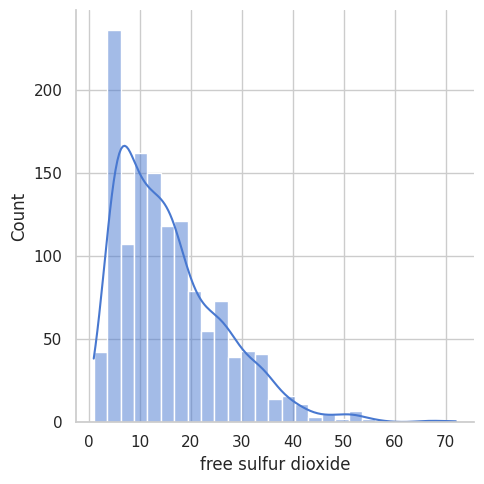

In [ ]:
sns.displot(df['free sulfur dioxide'], kde=True)

<Axes: xlabel='free sulfur dioxide'>

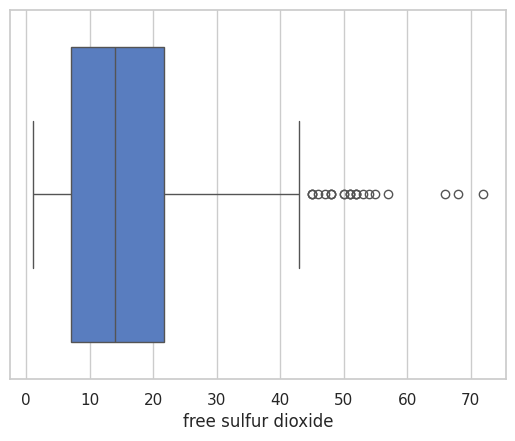

In [ ]:
sns.boxplot(data=df, x='free sulfur dioxide')

In [ ]:
find_outliers_using_interquartile_range(df, 'free sulfur dioxide')

(23, 13)

In [ ]:
df = new_df

In [ ]:
df.sample(1)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
579           10.6              0.31         0.49             2.2      0.063   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
579                 18.0                  40.0   0.9976  3.14       0.51   

     alcohol  quality  
579      9.8        6

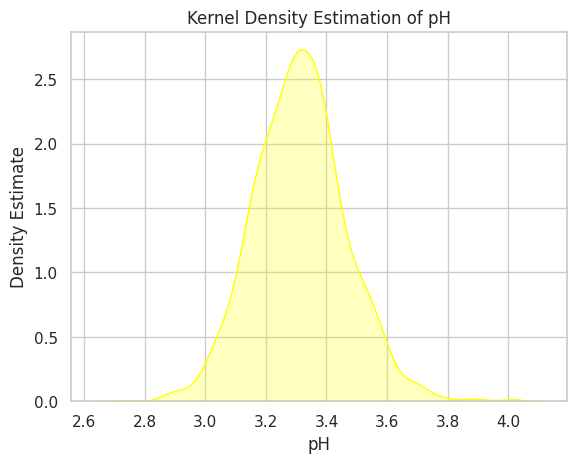

In [ ]:
# Plotting kernel density estimation plot for pH column
sns.kdeplot(df['pH'], color='yellow', fill=True)

# Adding labels and title
plt.xlabel('pH')
plt.ylabel('Density Estimate')
plt.title('Kernel Density Estimation of pH')

plt.show()

<Axes: xlabel='pH'>

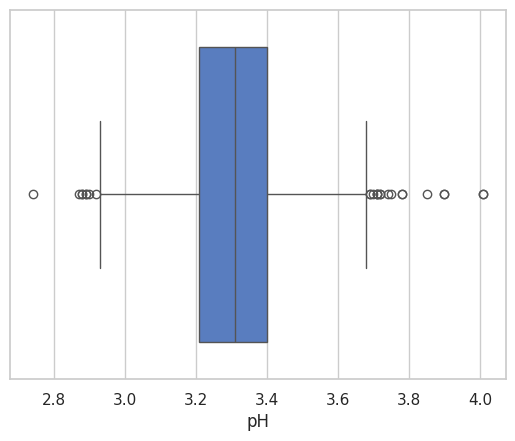

In [ ]:
sns.boxplot(data=df, x='pH')

In [ ]:
find_outliers_using_three_sigma_rule(df, 'pH')

(8, 12)

In [ ]:
new_df = remove_outliers_using_three_sigma_rule(df, 'pH')

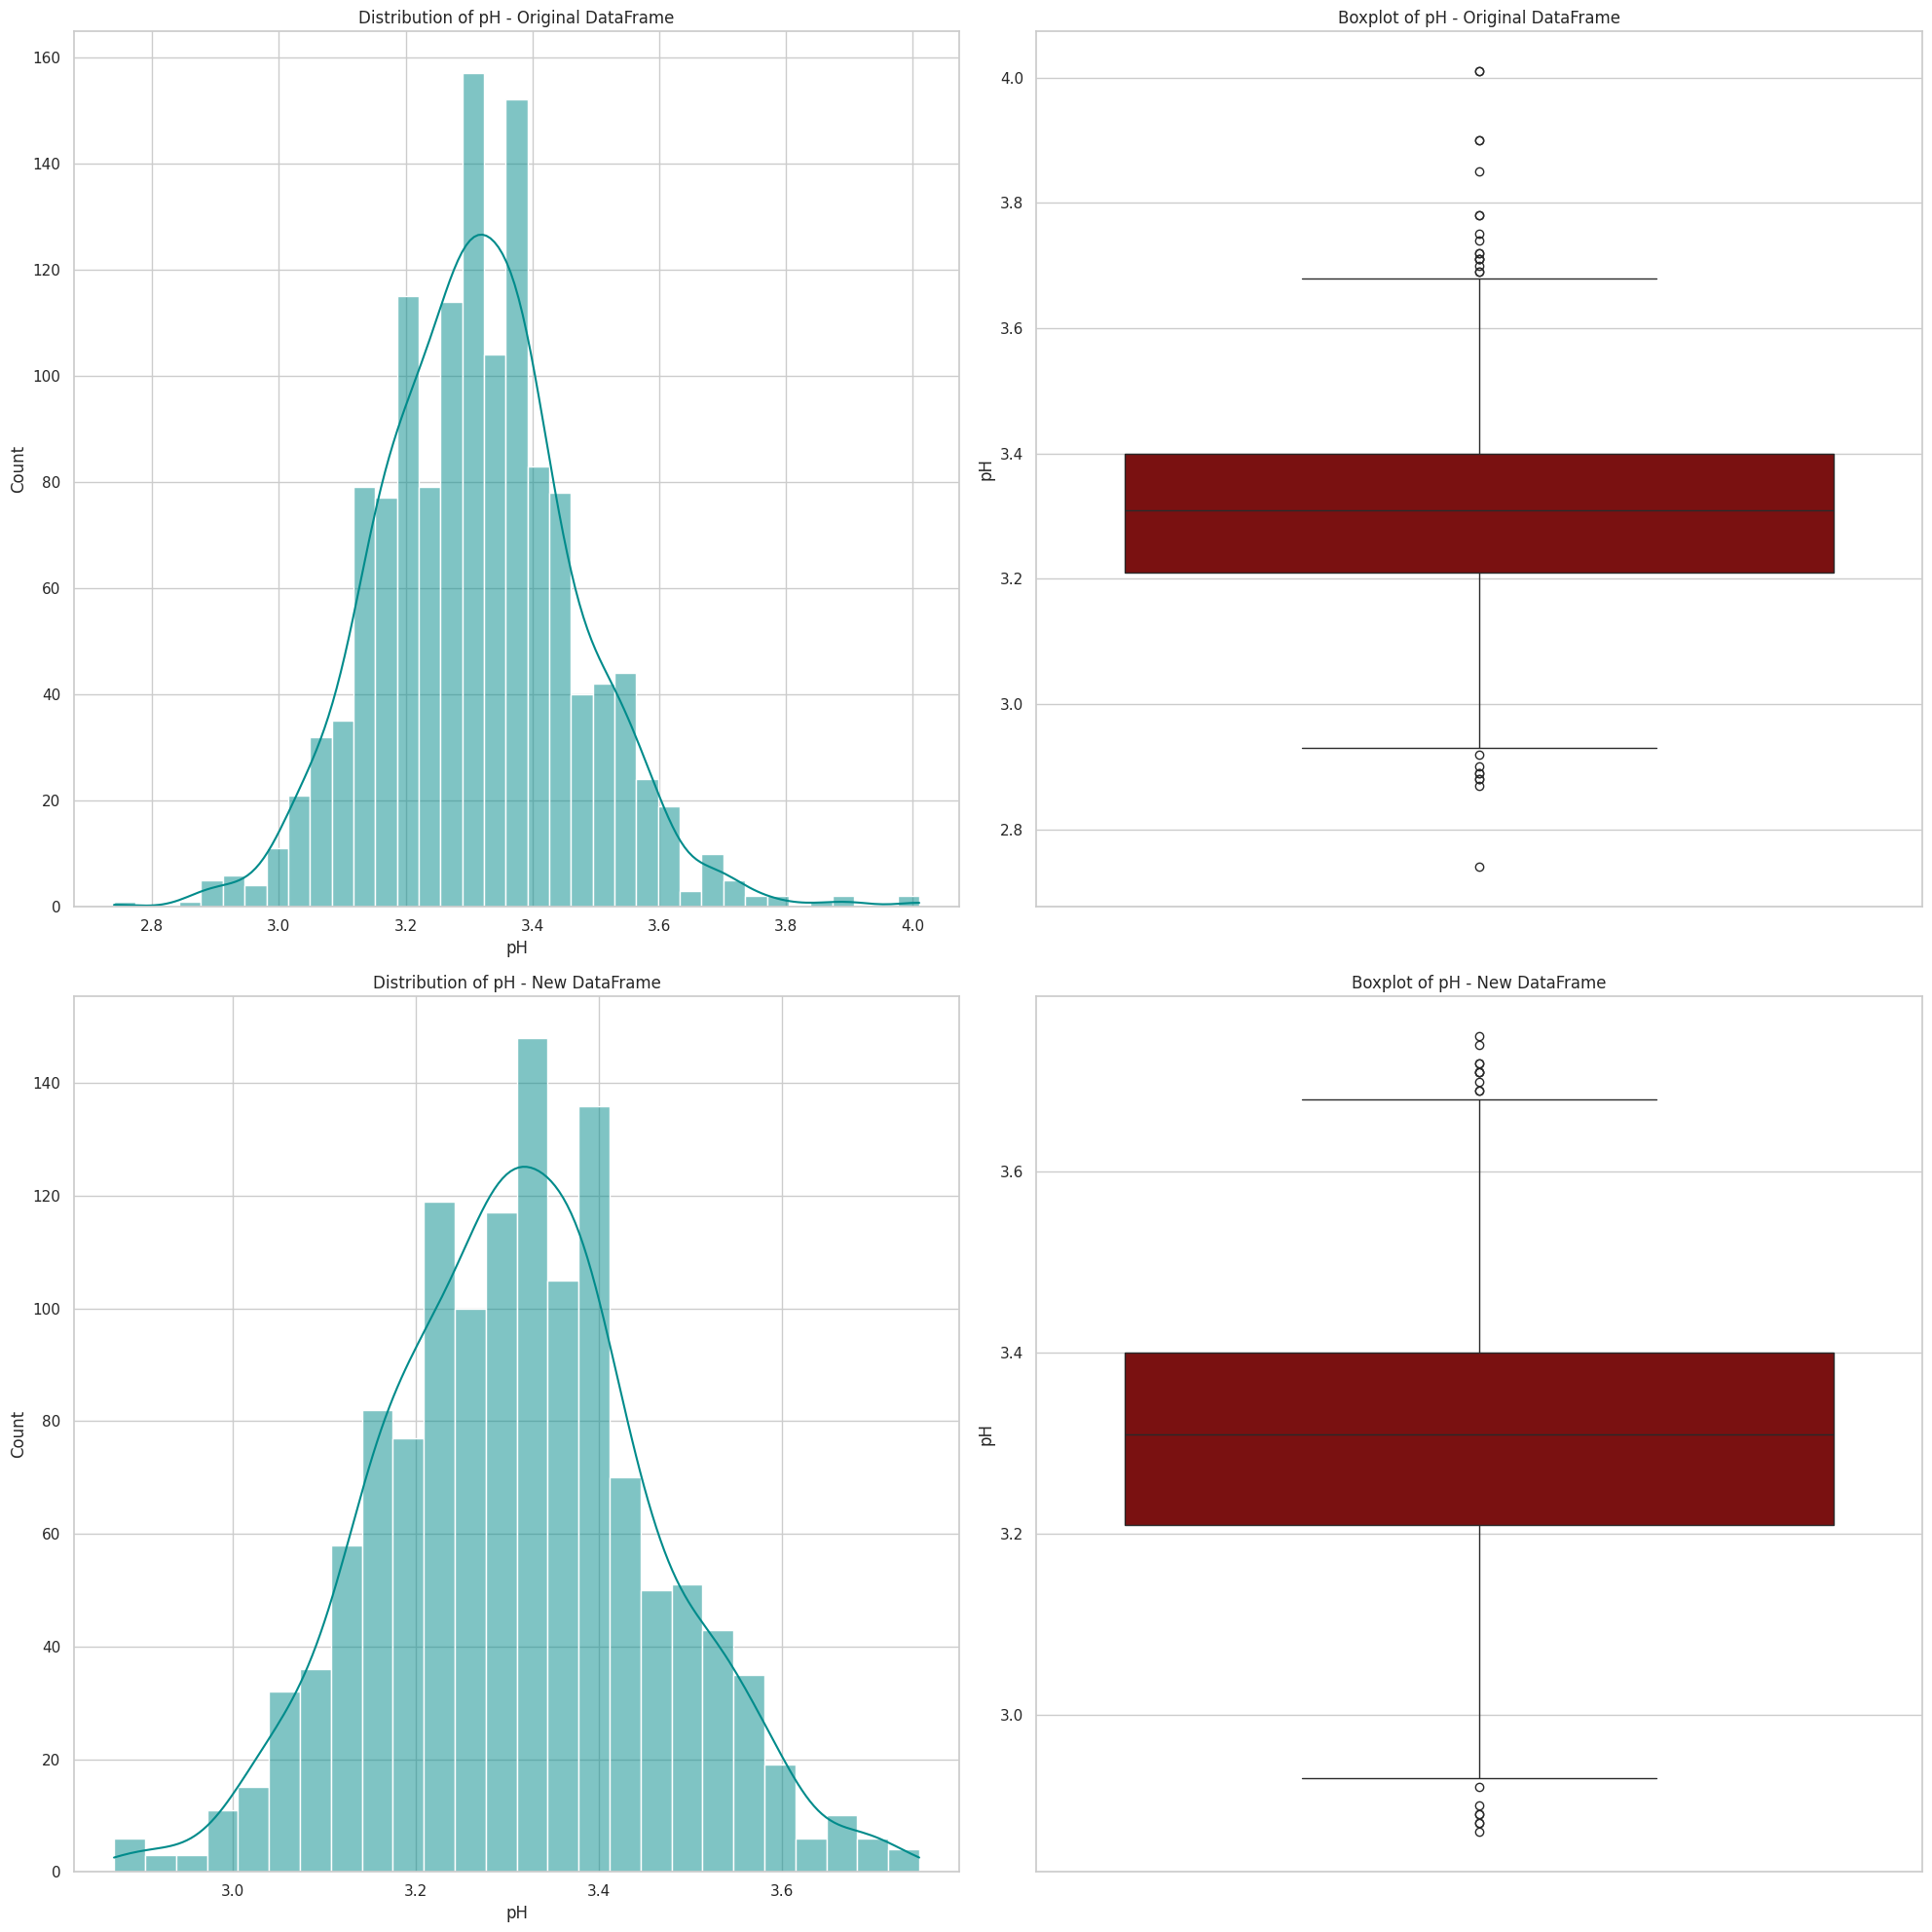

In [ ]:
plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
sns.histplot(df['pH'], kde=True, color='darkcyan')
plt.title('Distribution of pH - Original DataFrame')

plt.subplot(2, 2, 2)
sns.boxplot(df['pH'], color='darkred')
plt.title('Boxplot of pH - Original DataFrame')
plt.subplot(2, 2, 3)
sns.histplot(new_df['pH'], kde=True, color='darkcyan')
plt.title('Distribution of pH - New DataFrame')

plt.subplot(2, 2, 4)
sns.boxplot(new_df['pH'], color='darkred')
plt.title('Boxplot of pH - New DataFrame')

plt.tight_layout()  # Adjusts subplot parameters to give specified padding
plt.show()

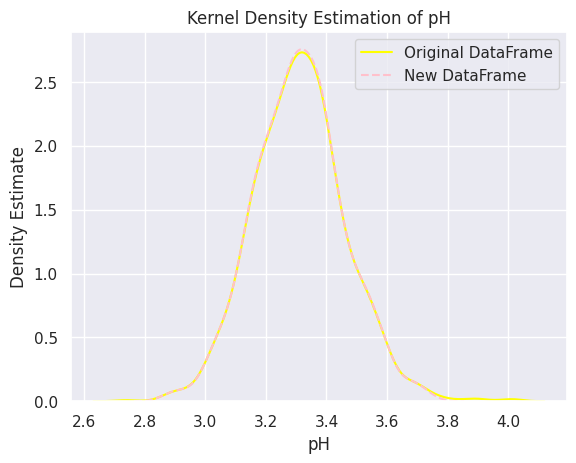

In [ ]:
# Setting a dark background style
sns.set_style("darkgrid")

# Plotting kernel density estimation plots without histogram
sns.kdeplot(df['pH'], color='yellow', label='Original DataFrame', linestyle='-')
sns.kdeplot(new_df['pH'], color='pink', label='New DataFrame', linestyle='--')

# Adding labels and title
plt.xlabel('pH')
plt.ylabel('Density Estimate')
plt.title('Kernel Density Estimation of pH')
plt.legend()

plt.show()

In [ ]:
df.sample(1)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1589            6.6             0.725          0.2             7.8      0.073   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1589                 29.0                  79.0   0.9977  3.29       0.54   

      alcohol  quality  
1589      9.2        5

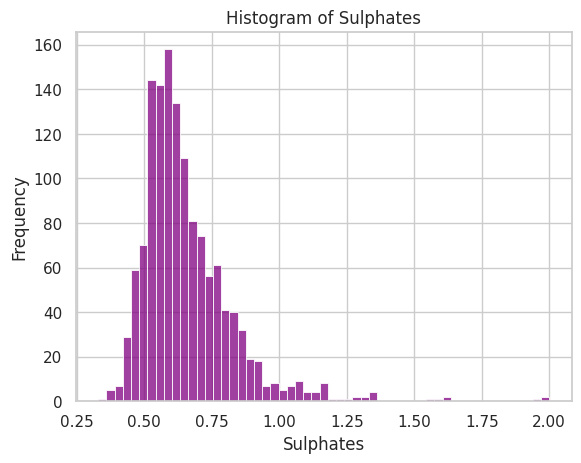

In [ ]:
# Create a histogram for the 'sulphates' column
sns.set_style("whitegrid")  # Setting the style
sns.histplot(df['sulphates'], color='purple', kde=False)  # Plotting the histogram without kernel density estimation
plt.xlabel('Sulphates')  # Adding label for x-axis
plt.ylabel('Frequency')  # Adding label for y-axis
plt.title('Histogram of Sulphates')  # Adding title to the plot
plt.show()  # Display the plot

<Axes: xlabel='sulphates'>

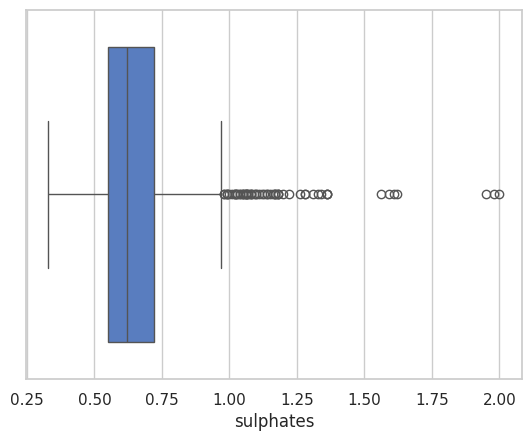

In [ ]:
sns.boxplot(data=df, x='sulphates')

In [ ]:
find_outliers_using_three_sigma_rule(df, 'sulphates')

(21, 12)

In [ ]:
df.sample(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
870            7.7             0.715         0.01             2.1      0.064   
85             6.9             0.550         0.15             2.2      0.076   
104            7.2             0.490         0.24             2.2      0.070   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
870                 31.0                  43.0  0.99371  3.41       0.57   
85                  19.0                  40.0  0.99610  3.41       0.59   
104                  5.0                  36.0  0.99600  3.33       0.48   

     alcohol  quality  
870     11.8        6  
85      10.1        5  
104      9.4        5

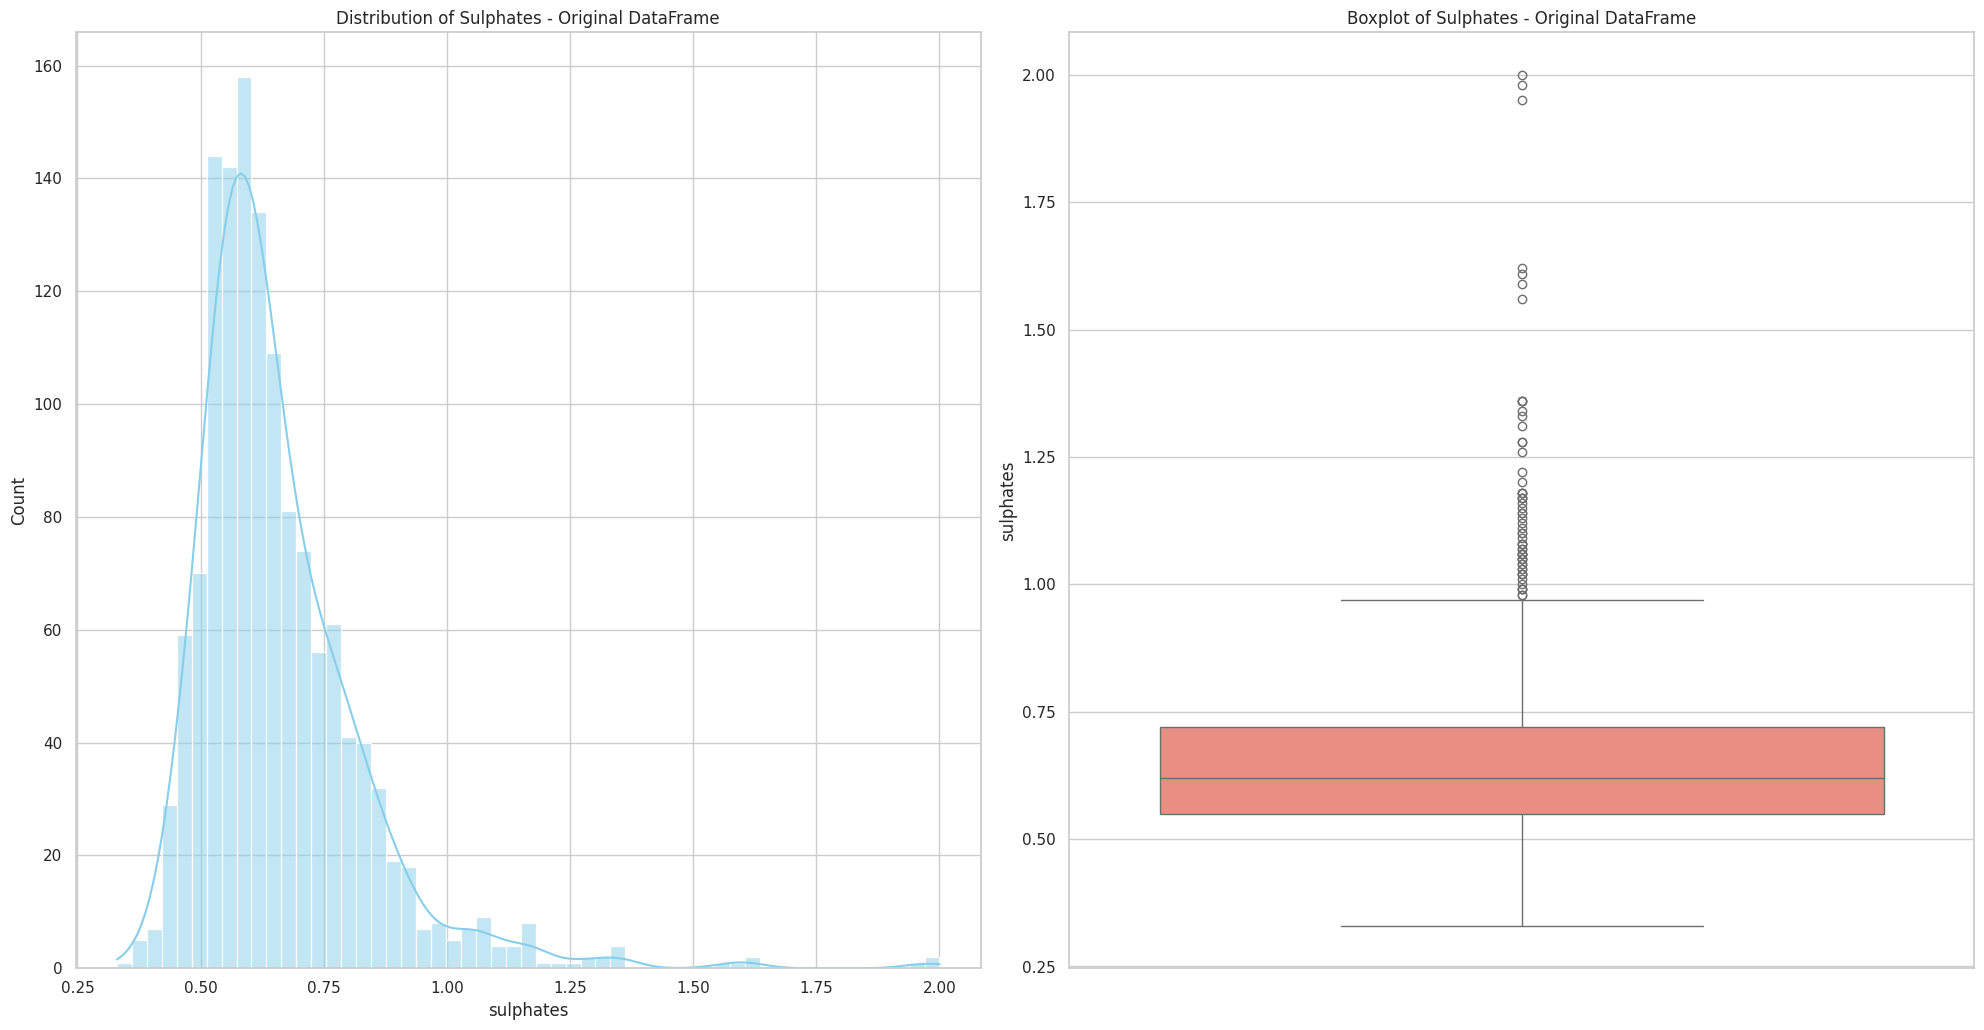

In [ ]:
plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
sns.histplot(df['sulphates'], kde=True, color='skyblue')
plt.title('Distribution of Sulphates - Original DataFrame')
plt.subplot(2, 2, 2)
sns.boxplot(df['sulphates'], color='salmon')
plt.title('Boxplot of Sulphates - Original DataFrame')
plt.tight_layout()
plt.show()

In [ ]:
df = new_df

In [ ]:
df.sample(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1003            6.8             0.360         0.32             1.8      0.067   
998             8.9             0.840         0.34             1.4      0.050   
1189            8.8             0.955         0.05             1.8      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1003                  4.0                   8.0  0.99280  3.36       0.55   
998                   4.0                  10.0  0.99554  3.12       0.48   
1189                  5.0                  19.0  0.99616  3.30       0.44   

      alcohol  quality  
1003     12.8        7  
998       9.1        6  
1189      9.6        4

Split data into train and test data

In [ ]:
x = df.drop('quality', axis=1)
y = df['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

Feature Scaling

In [ ]:
scalor = StandardScaler()
x_train = scalor.fit_transform(x_train)
x_test = scalor.transform(x_test)

Model Selection and Training

In [ ]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

In [ ]:
# Train the model
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the test set
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([6, 6, 6, 5, 6, 6, 6, 7, 6, 5, 5, 4, 6, 5, 7, 6, 6, 5, 5, 6, 5, 6,
       5, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 5, 6, 5, 5, 5, 7, 5, 6, 6, 5, 5,
       6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 6, 7, 5, 6, 5, 5, 7, 5, 5, 5, 5, 6,
       6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 7, 6, 5, 5, 5, 6, 5, 7, 6, 6, 5,
       5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 7, 5, 6, 5, 7, 6, 7, 6, 6,
       5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 7, 7, 6, 5, 6, 5, 6, 5, 5, 5, 6,
       5, 6, 4, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 7, 5, 7, 5, 5,
       5, 6, 5, 6, 6, 7, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 7, 5, 6, 5, 5, 5,
       6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 7, 6, 5, 6, 5, 5, 5, 5,
       6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5,
       6, 6, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 7, 5, 6, 5, 5, 6, 6, 6, 5, 6,
       6, 6, 7, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5,
       7, 5, 5, 7, 5])

Evaluate the model

In [ ]:
accuracy_score(y_test, y_pred)

0.6282527881040892

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 0,  0,  1,  0,  0,  0],
       [ 0,  0,  8,  4,  0,  0],
       [ 0,  0, 88, 28,  1,  0],
       [ 0,  0, 29, 59, 12,  0],
       [ 0,  0,  2, 21, 10,  0],
       [ 0,  0,  0,  2,  1,  0]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         5
           5       0.70      0.71      0.70       127
           6       0.60      0.64      0.62       110
           7       0.43      0.38      0.40        24
           8       0.00      0.00      0.00         1

    accuracy                           0.63       269
   macro avg       0.29      0.29      0.29       269
weighted avg       0.61      0.63      0.62       269



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Building a predictive system

In [ ]:
input_data = (12.5,0.28,0.54,2.3,0.082,12,29,0.9997,3.11,1.36,9.8)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[5]
Bad Quality Wine


In [ ]:
input_data = (7.1,0.71,0,1.9,0.08,14,35,0.9972,3.47,0.55,9.4,4.5)
# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[5]
Bad Quality Wine
